In [1]:
# Connect to covid_data database
import mysql.connector

covid_db = mysql.connector.connect(
    host="localhost",
    user="covidAnalyst",
    passwd="P@ssw0rd",
    auth_plugin='mysql_native_password',
    database="covid_data",
    allow_local_infile=True
)

In [2]:
 %load_ext sql

In [3]:
# %%Country_Region
%sql mysql+mysqldb://covidAnalyst:P@ssw0rd@localhost/covid_data

'Connected: covidAnalyst@covid_data'

In [4]:
#%%sql
#select * from covid_global where Country_Region="USA";

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.rcParams["figure.figsize"] = (20,10)

In [18]:
selectCursor = covid_db.cursor()
states = []
sqlQuery = "select distinct(Province_State) from covid_USA_State;" #where Country_Region=\"US\";"
selectCursor.execute(sqlQuery)
myresult = selectCursor.fetchall()
for state in myresult:
    states.append(state[0])
selectCursor.close()

True

In [19]:
selectCursor.fetchall()

AttributeError: 'NoneType' object has no attribute 'unread_result'

In [20]:
selectCursor = covid_db.cursor()
tableName = "covid_USA_State"
countQuery = "select * from " + tableName +";"
print(countQuery)
selectCursor.execute(countQuery)
rows = selectCursor.fetchall()
print('Total Row(s):', selectCursor.rowcount)
selectCursor.close()

select * from covid_USA_State;
Total Row(s): 13398


True

In [21]:
len(states)

58

In [22]:
def cummulative_case_visualization(state):
    selectCursor = covid_db.cursor()
    sqlQuery = "select Confirmed from covid_USA_State WHERE Province_State=\"" + state + "\" order by Last_Update;"
    selectCursor.execute(sqlQuery)
    myresult = selectCursor.fetchall()
    selectCursor.close()
    transformed_result = []
    for x in myresult:
        transformed_result.append(x[0])
    pd.DataFrame(transformed_result).plot(kind="bar")
    plt.legend(fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    return

In [23]:
import numpy as np

def daily_case_visualization(state):
    selectCursor = covid_db.cursor()
    sqlQuery = "select Confirmed from covid_USA_State WHERE Province_State=\"" + state + "\" order by Last_Update;"
    selectCursor.execute(sqlQuery)
    myresult = selectCursor.fetchall()
    selectCursor.close()
    transformed_result = []
    for x in myresult:
        transformed_result.append(x[0])
    daily_cases = []
    for i in range(len(transformed_result) - 1):
        daily_case = transformed_result[i+1] - transformed_result[i]
        daily_cases.append(daily_case)
    daily_cases_df = pd.DataFrame(daily_cases)
    rolling_mean = daily_cases_df.rolling(window=7).mean()
    daily_cases_df.plot(kind="bar", label='Daily Cases')
    plt.plot(rolling_mean, color='orange', linewidth=3, label=state)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    return

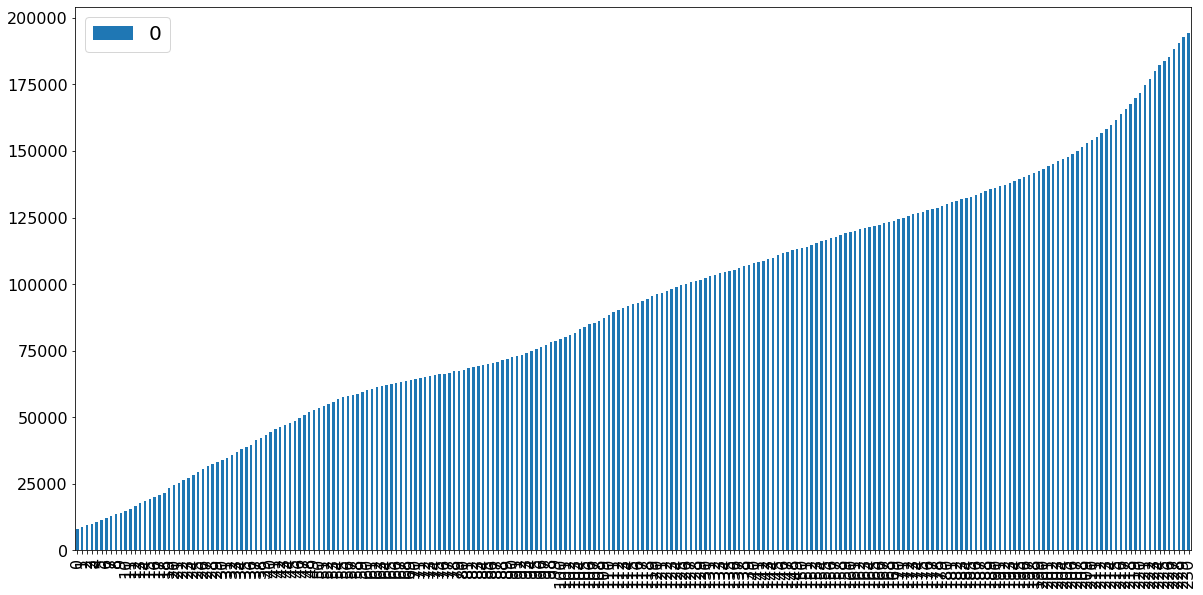

In [24]:
state = "Maryland"
cummulative_case_visualization(state)

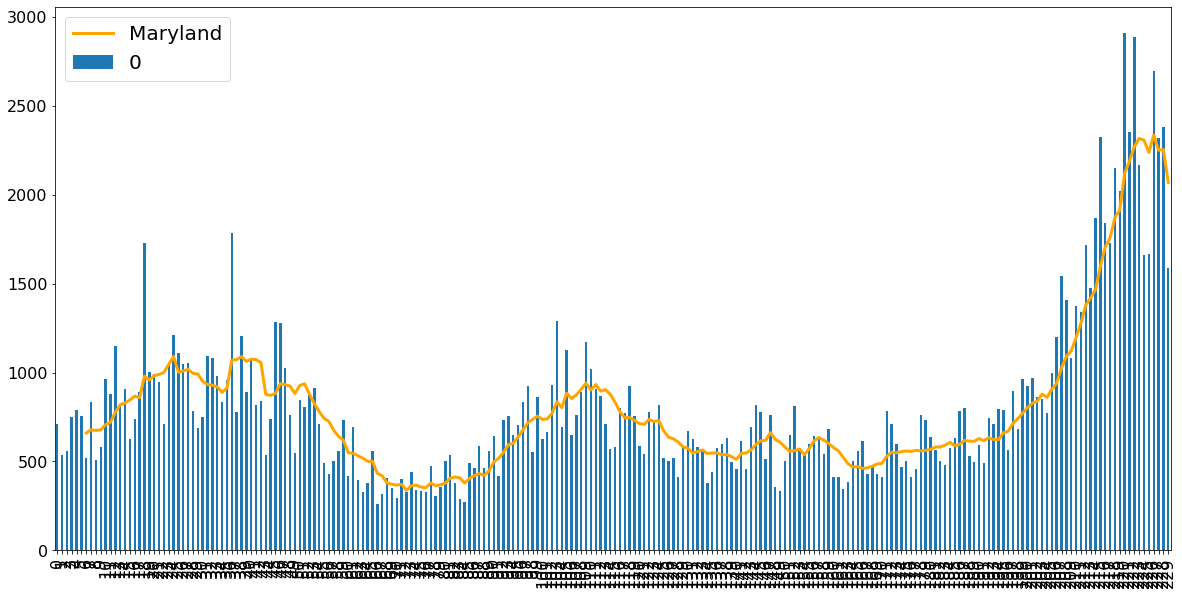

In [25]:
daily_case_visualization(state)

/Users/anirban-mac/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


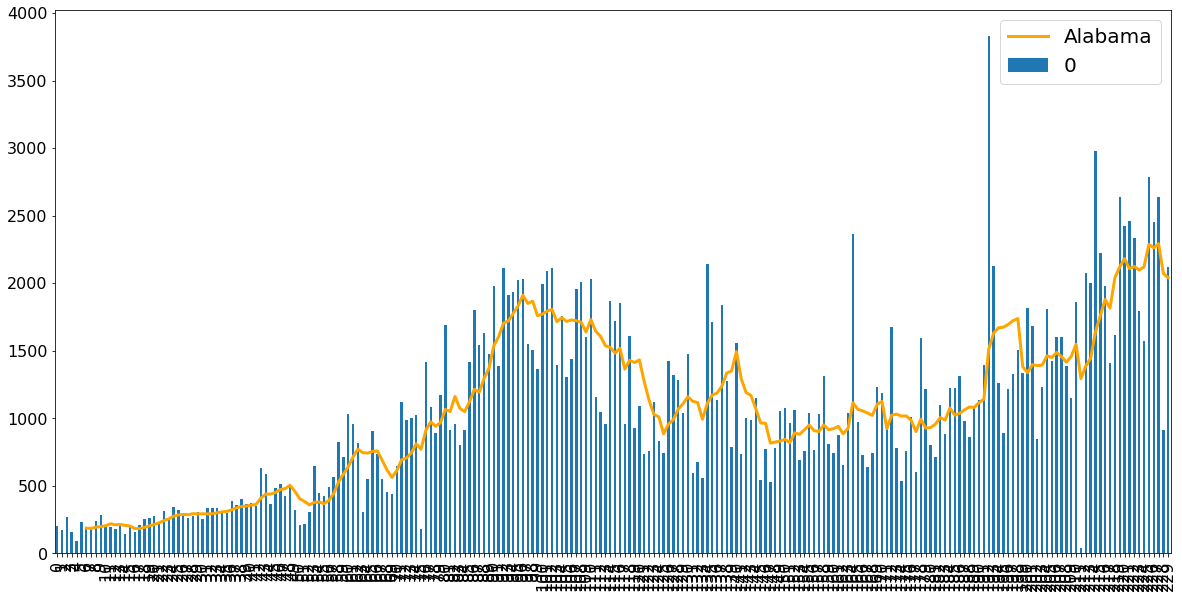

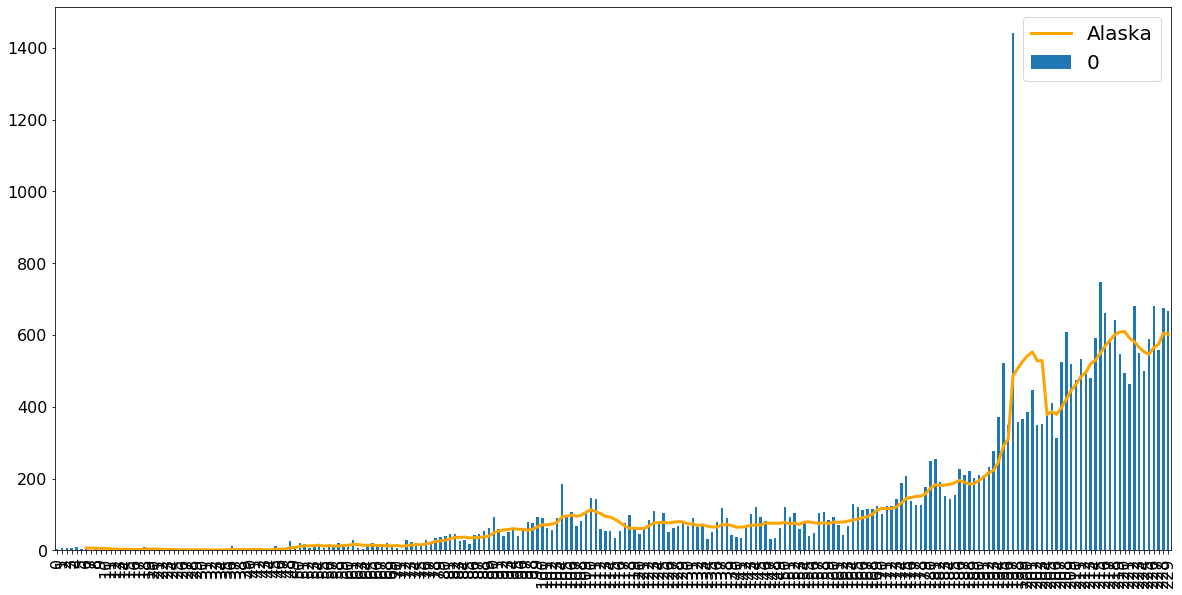

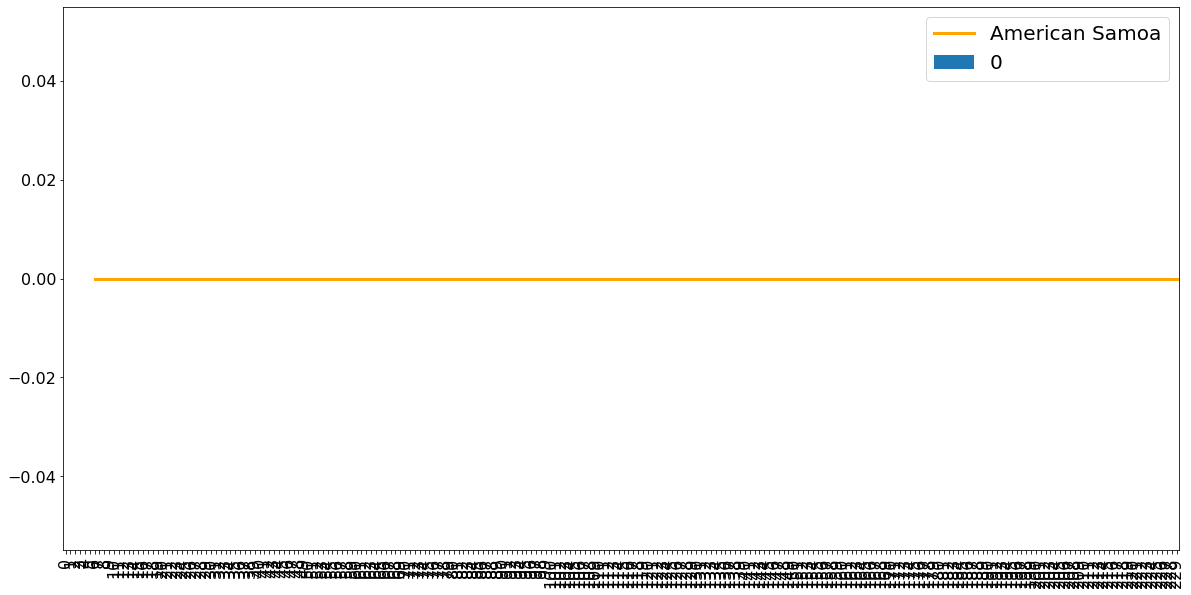

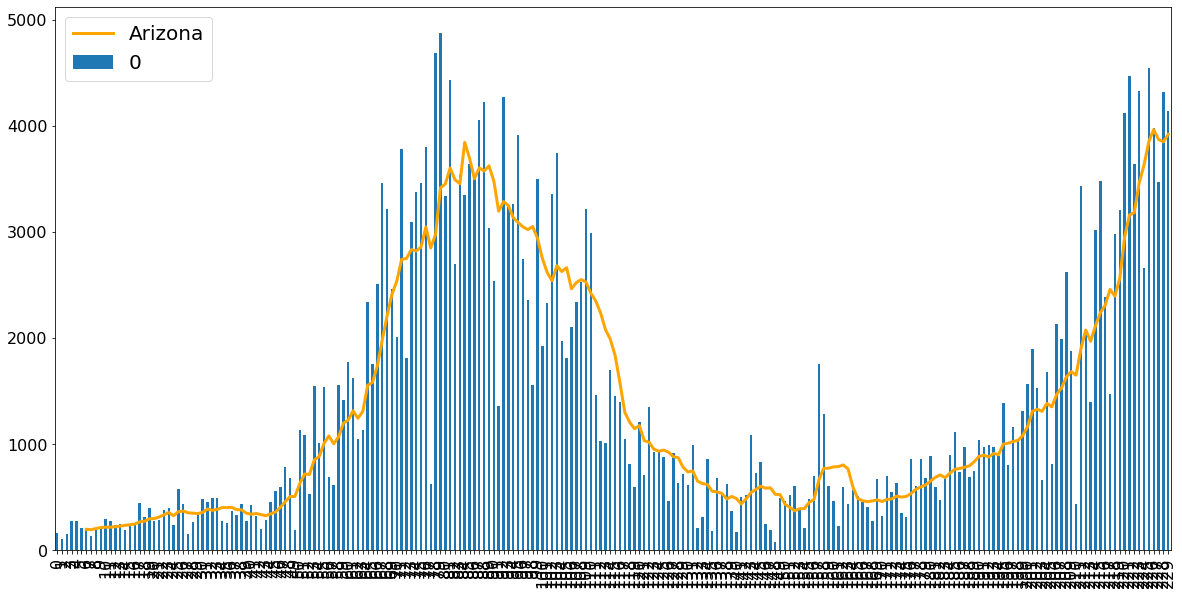

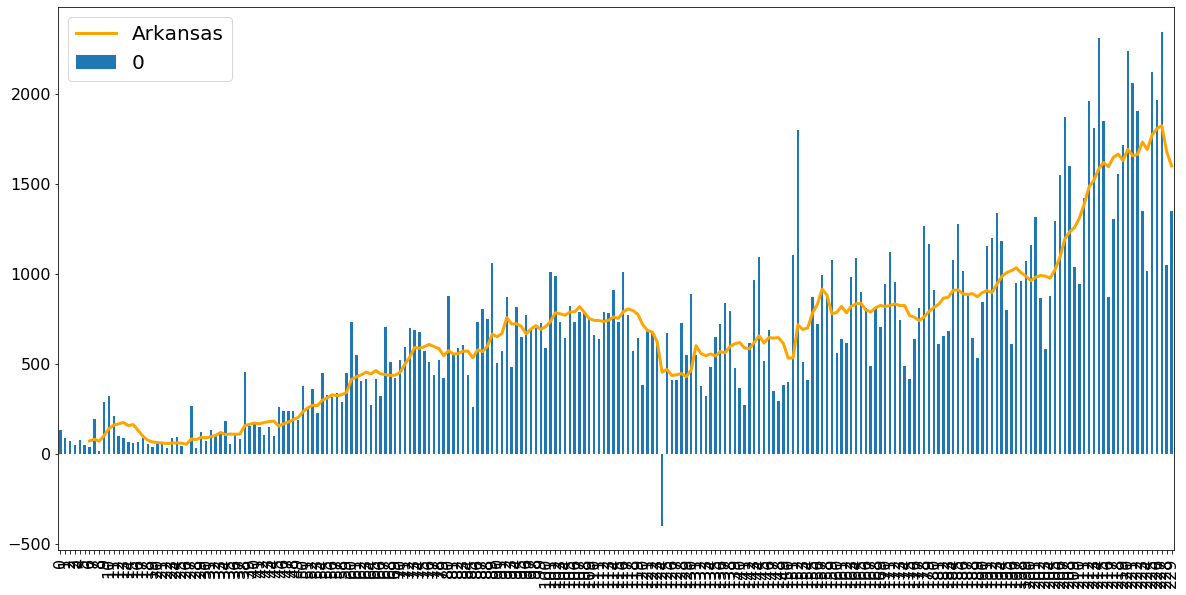

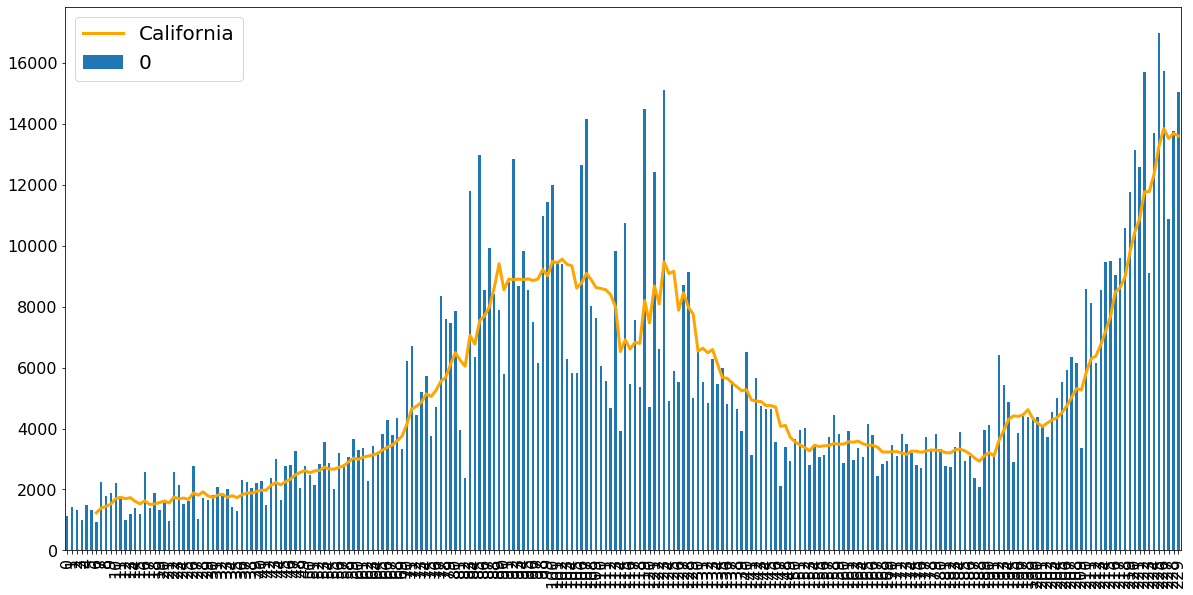

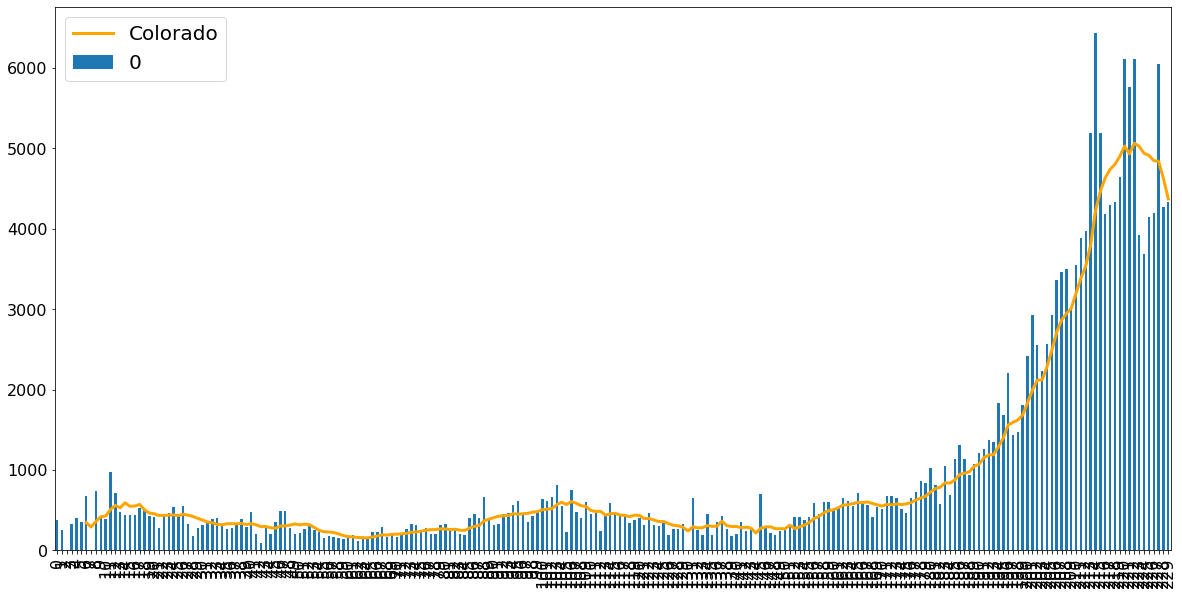

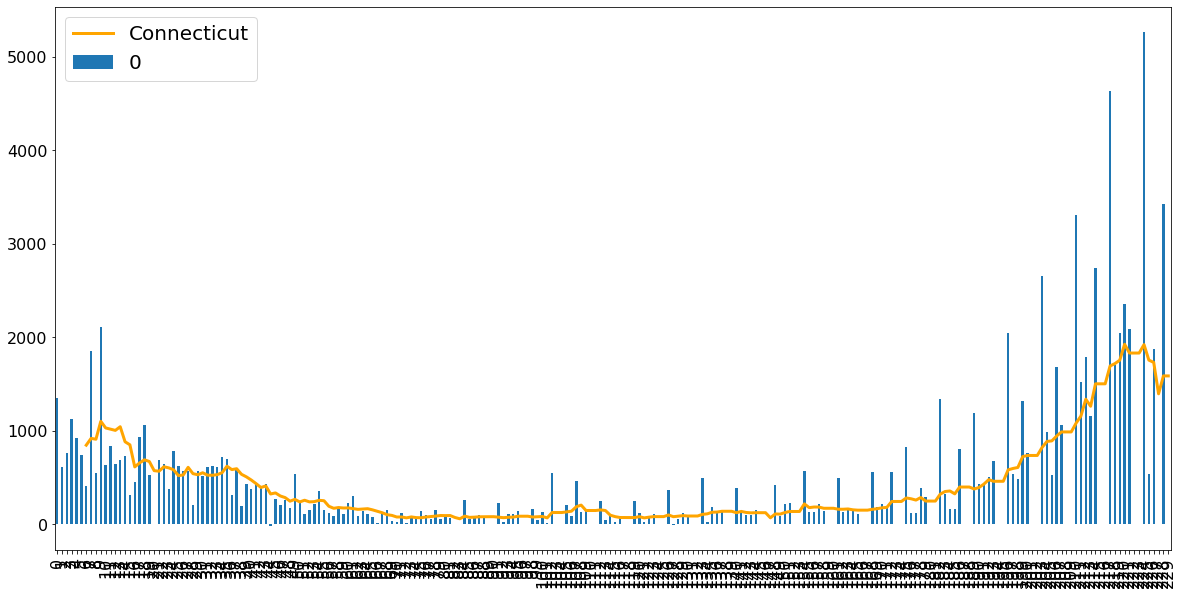

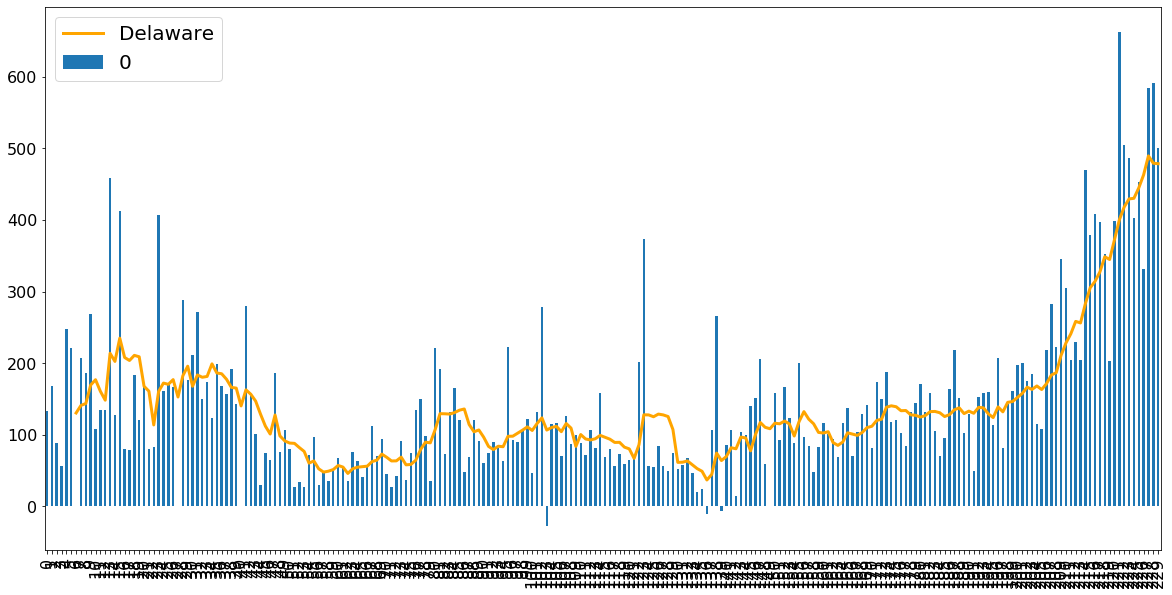

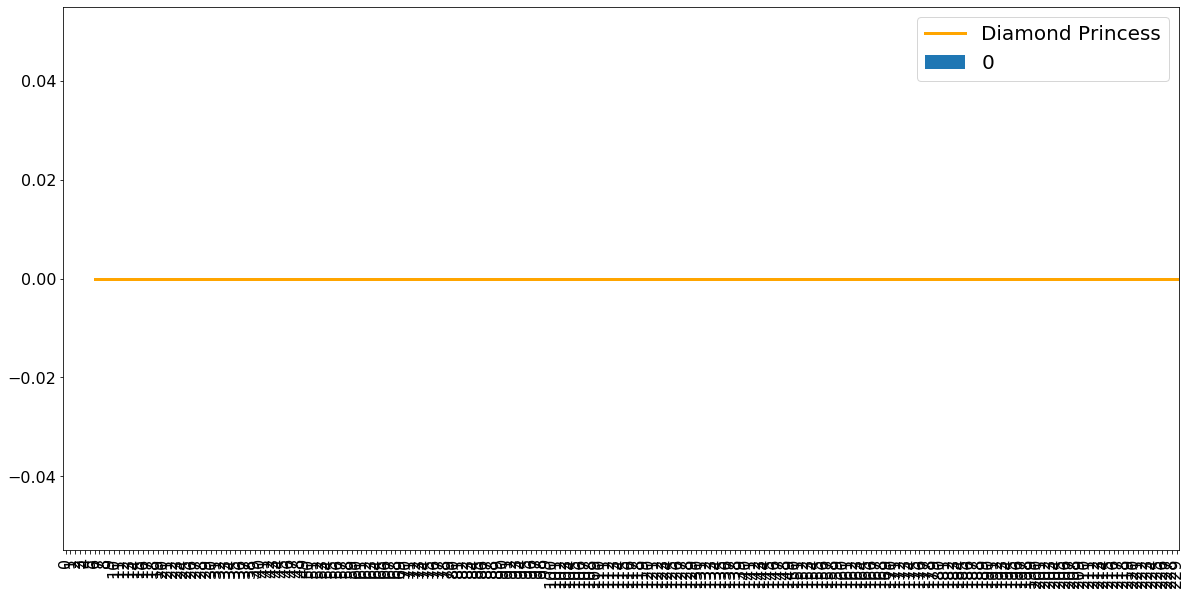

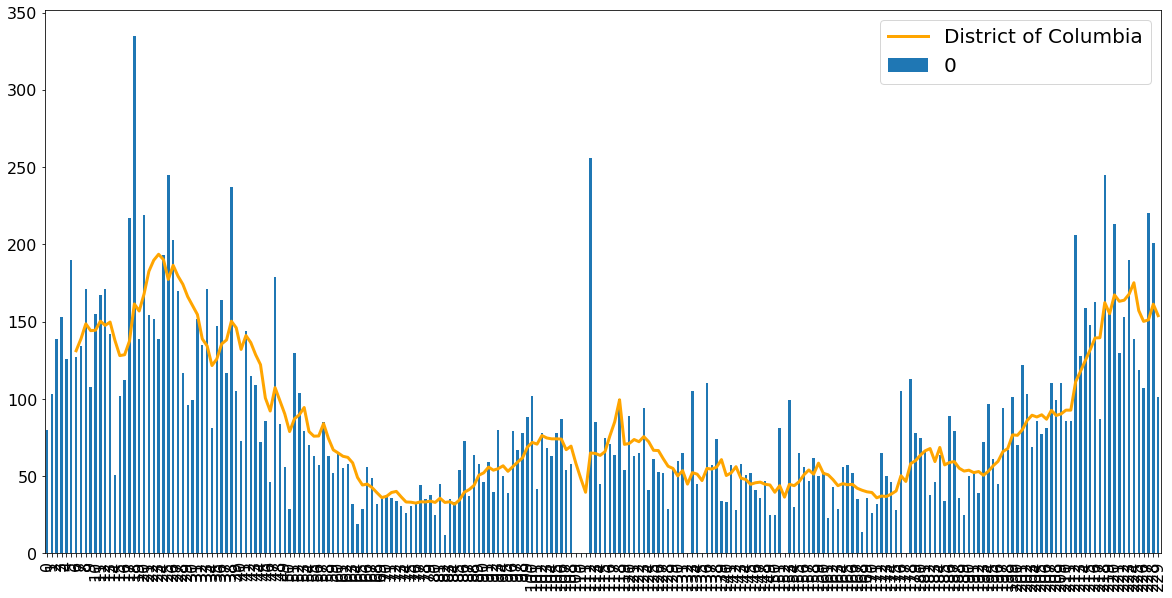

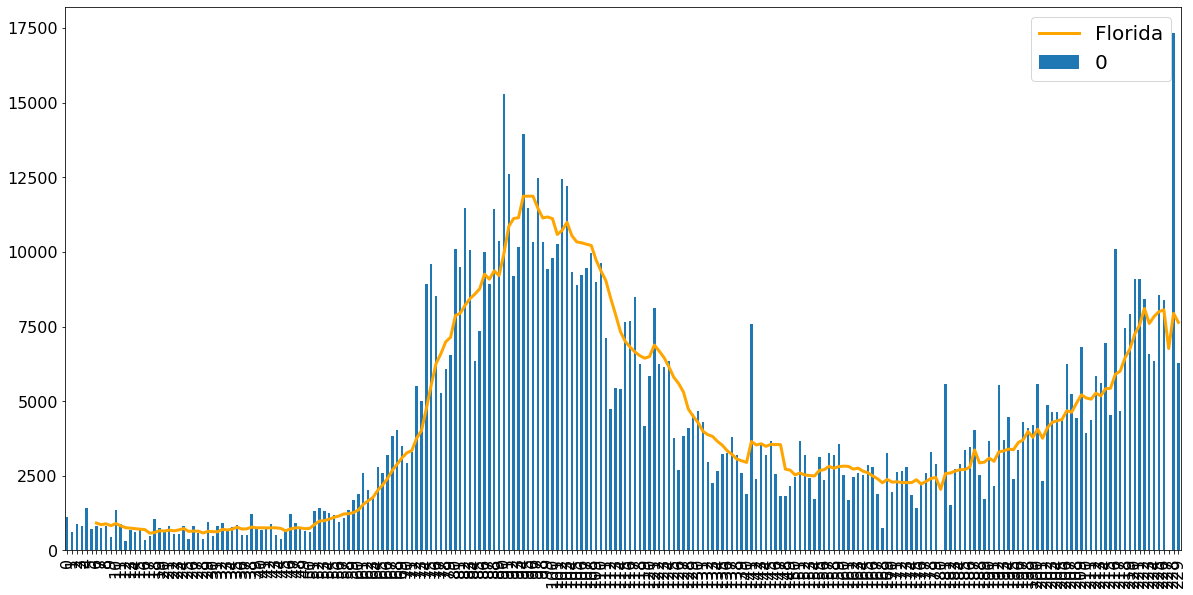

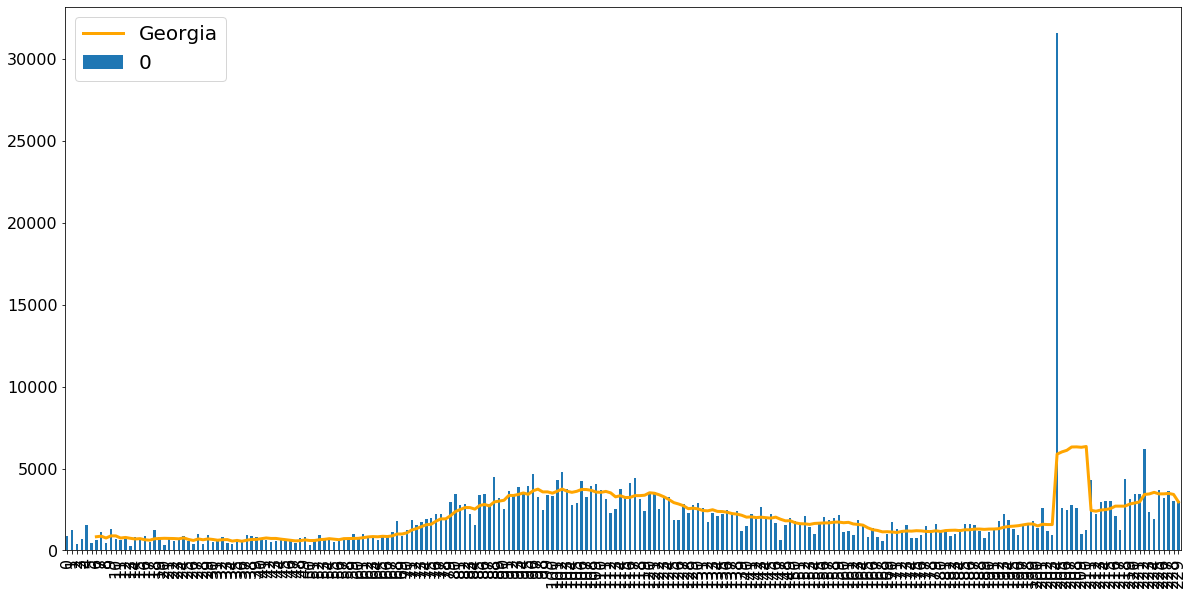

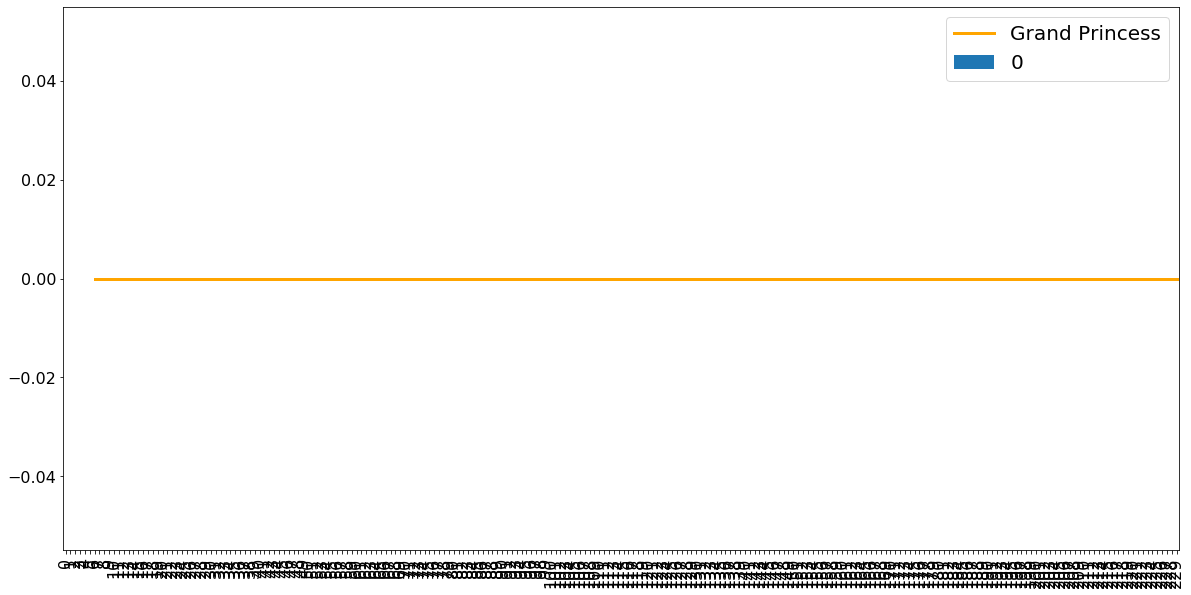

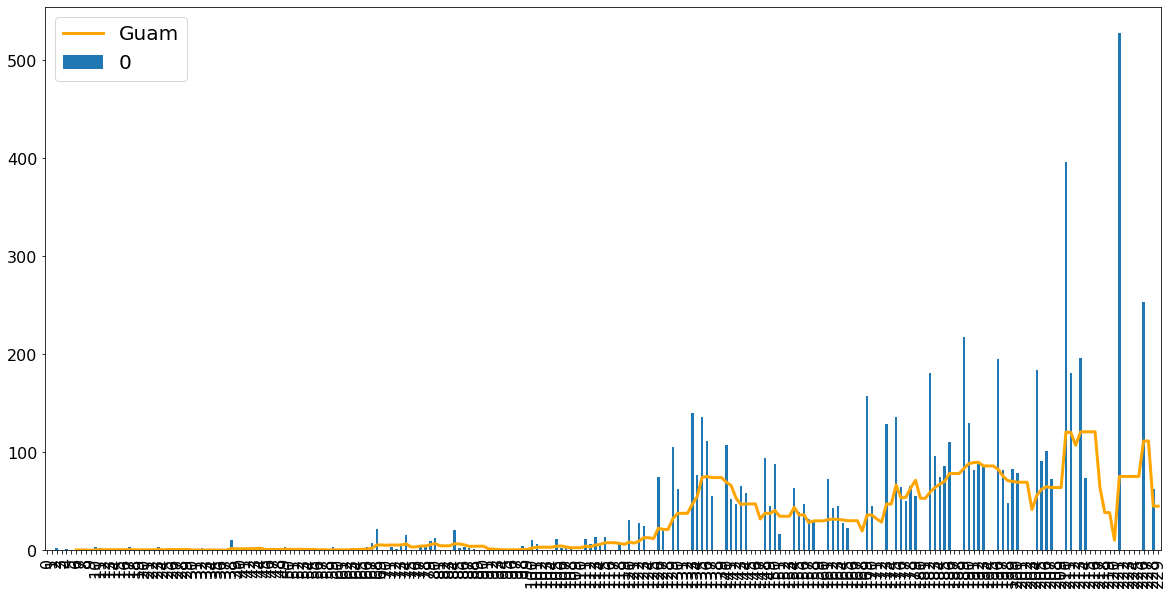

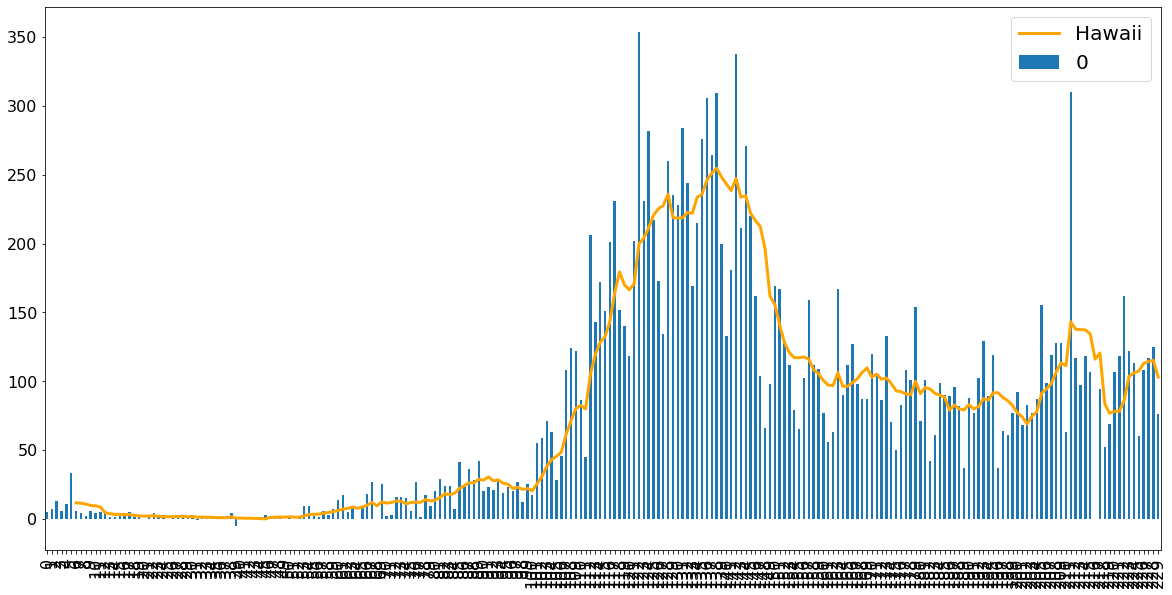

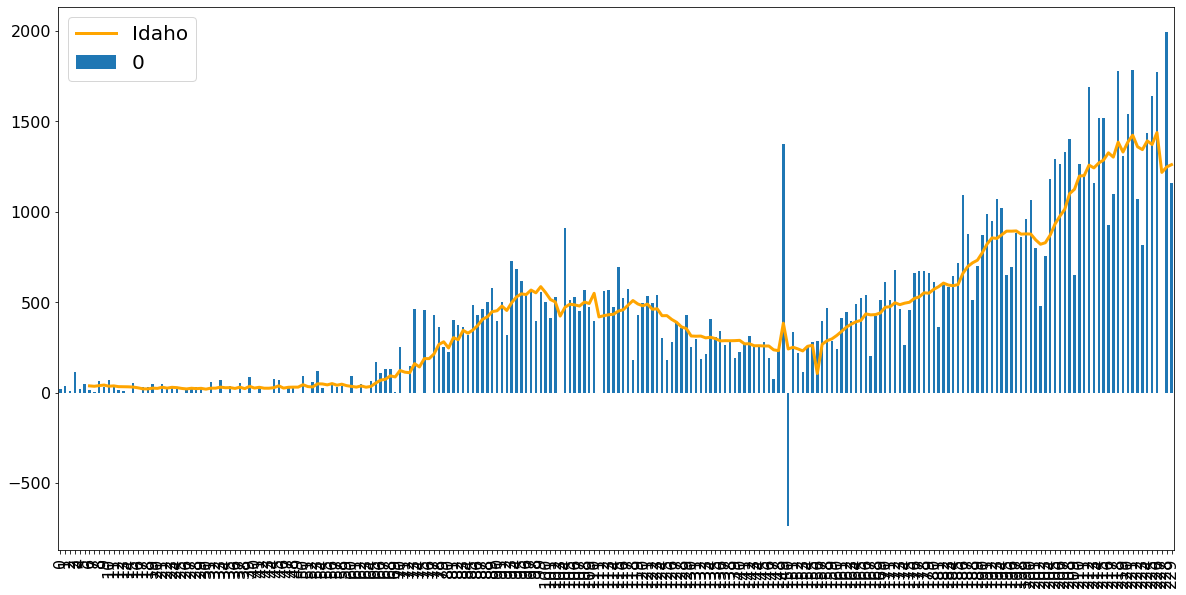

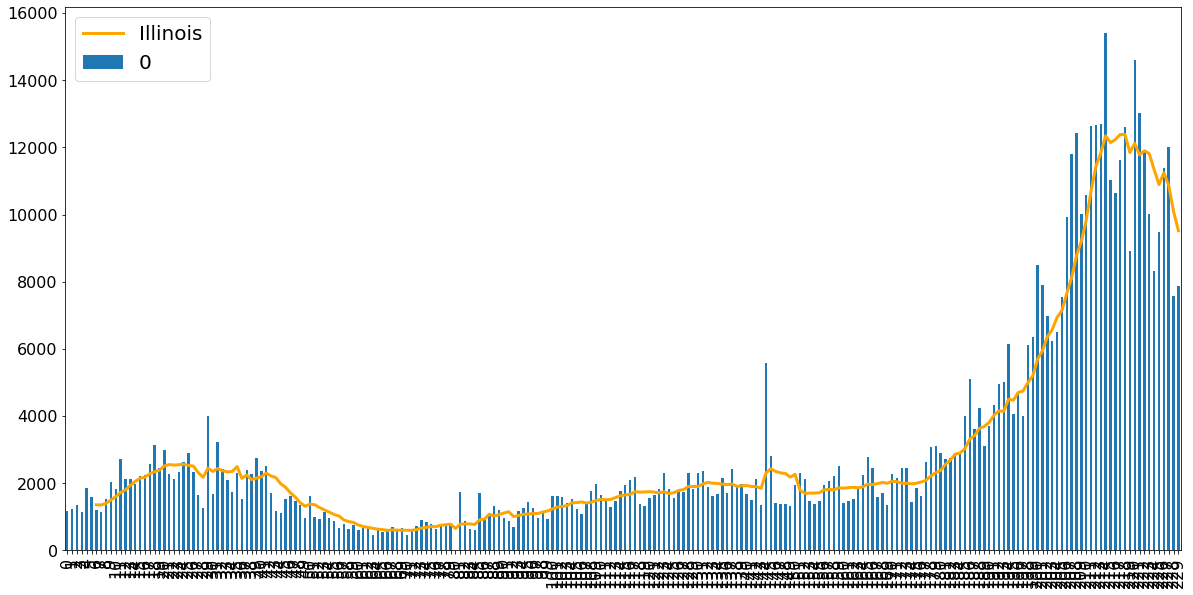

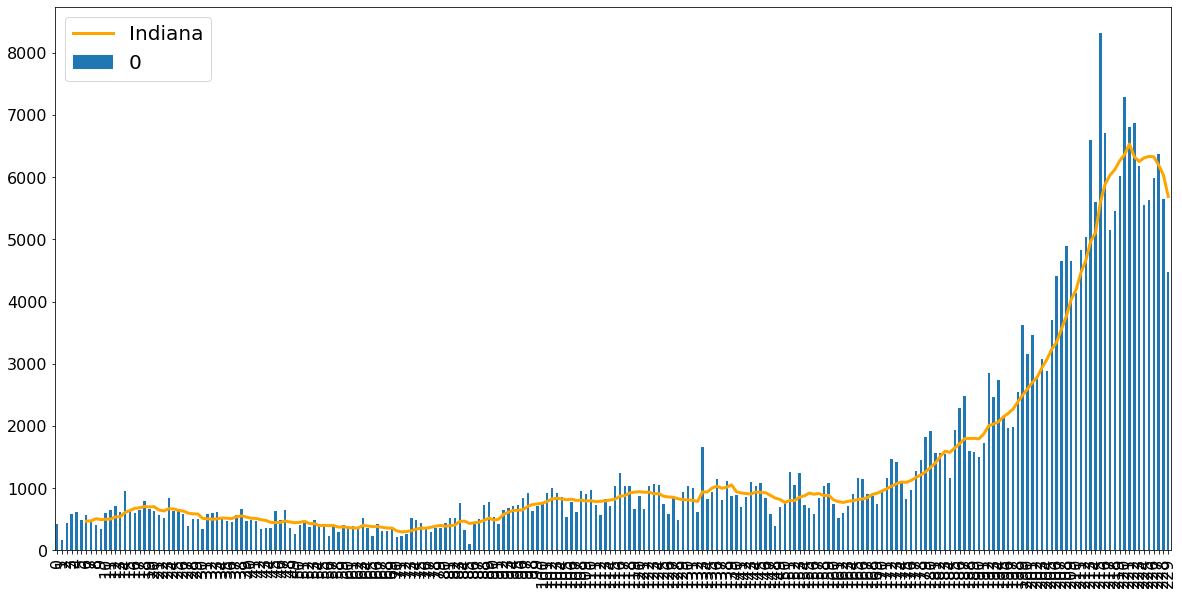

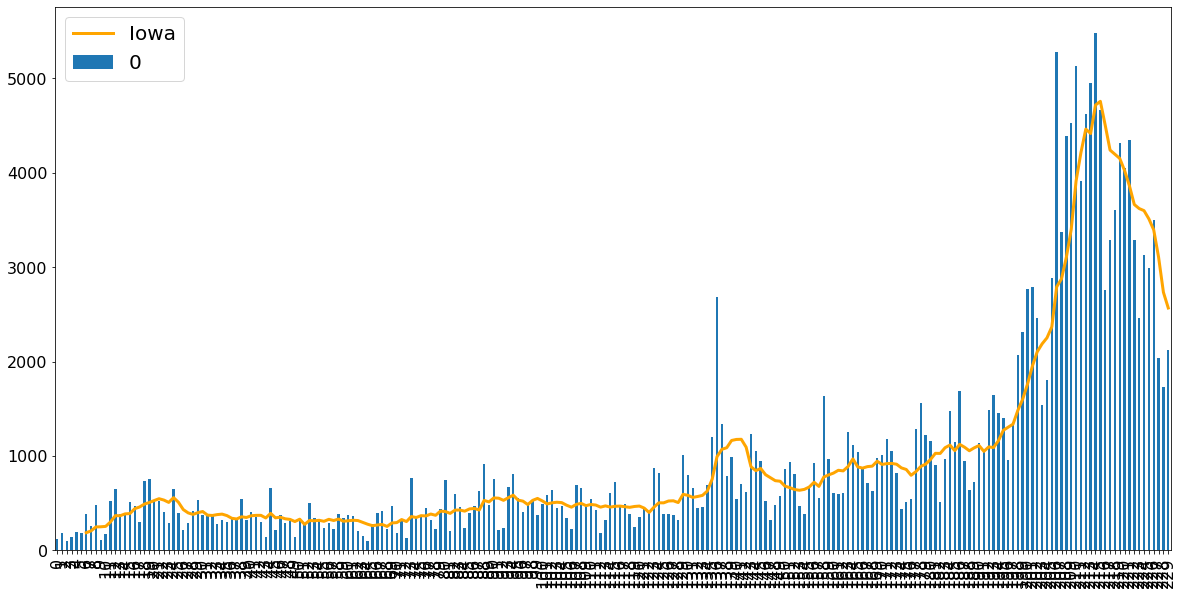

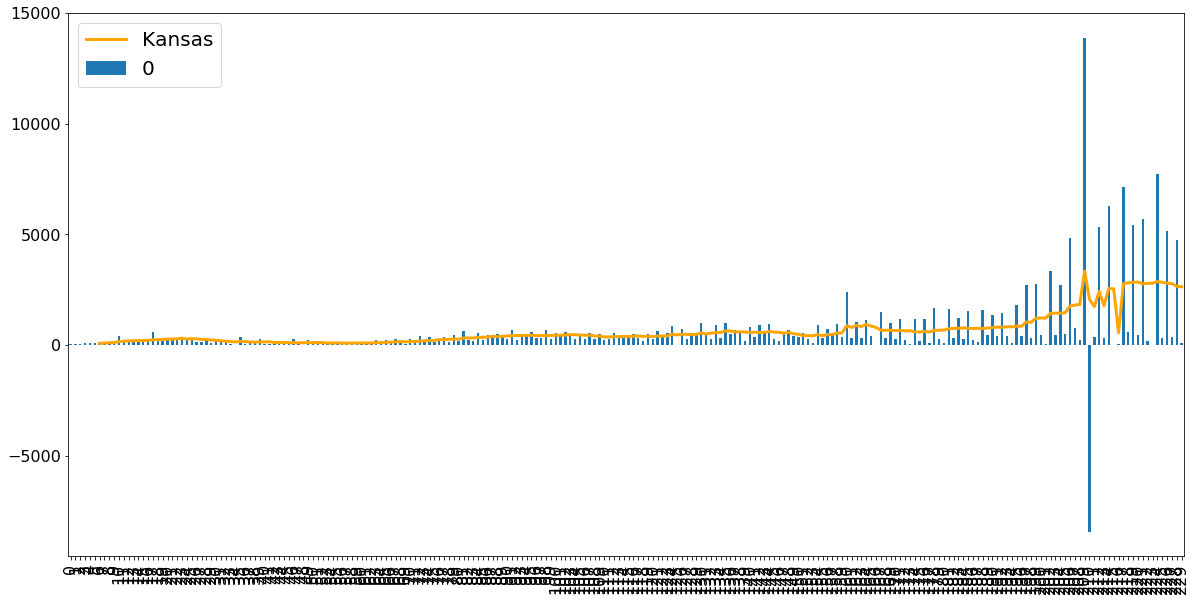

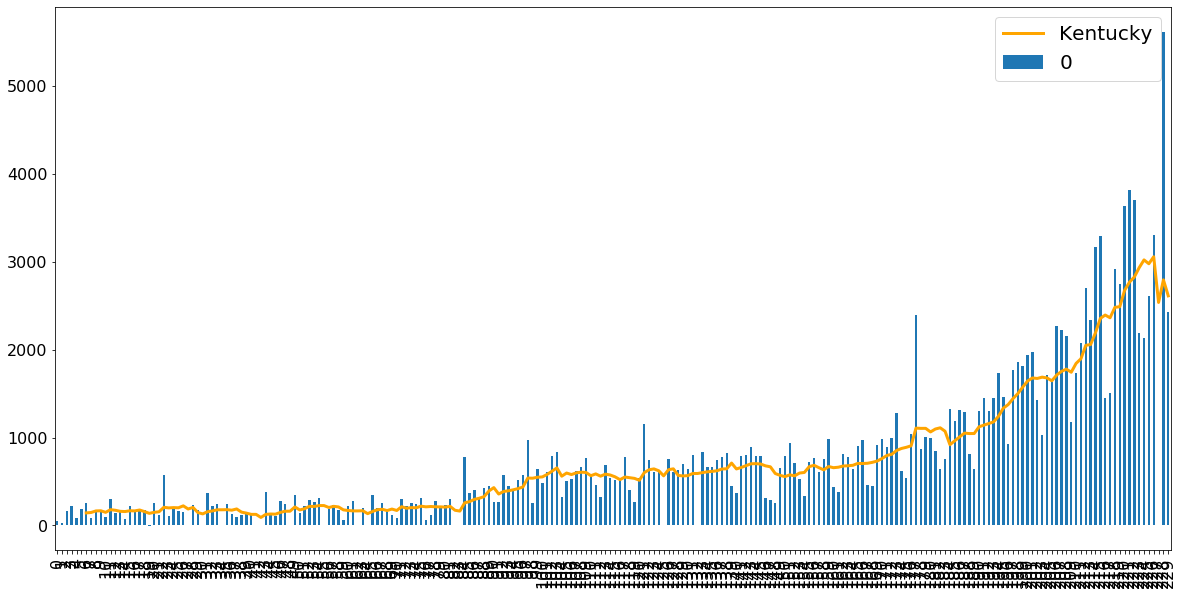

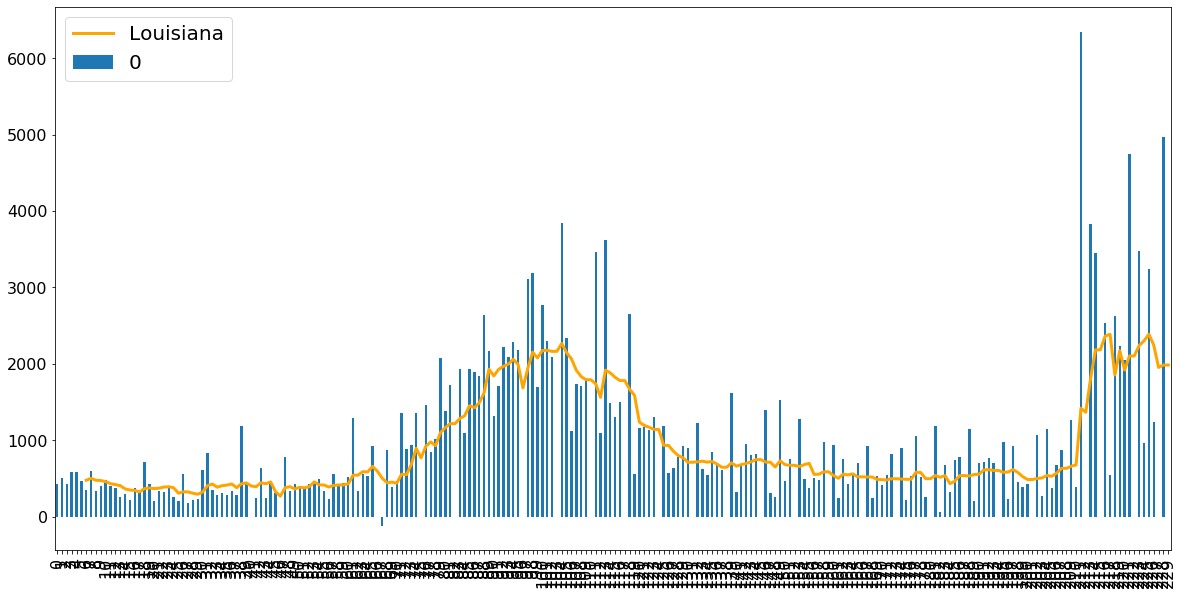

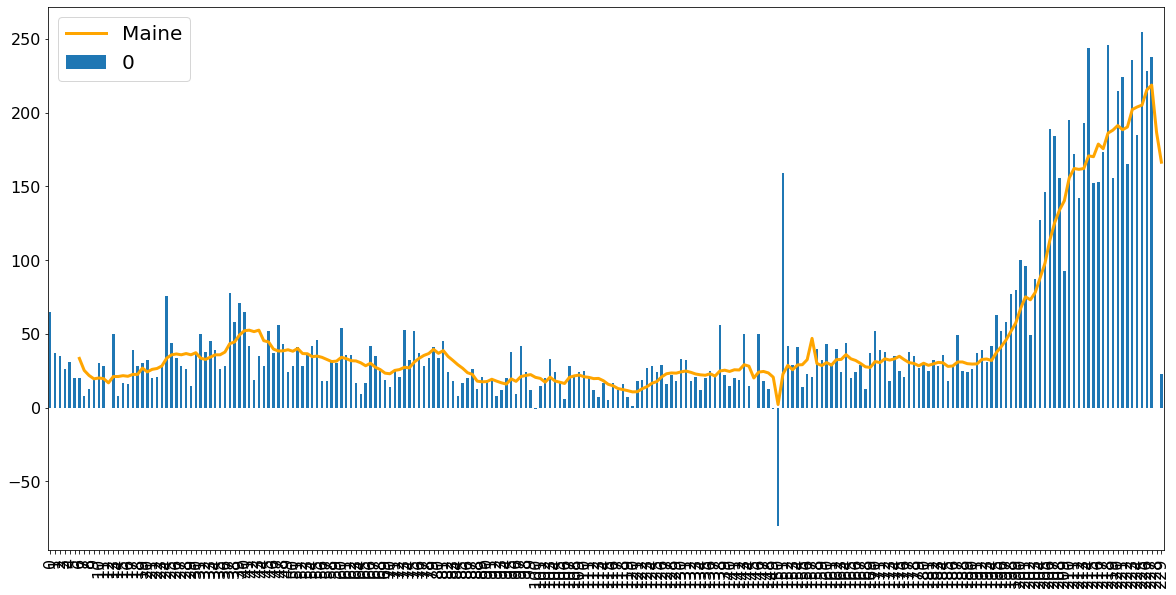

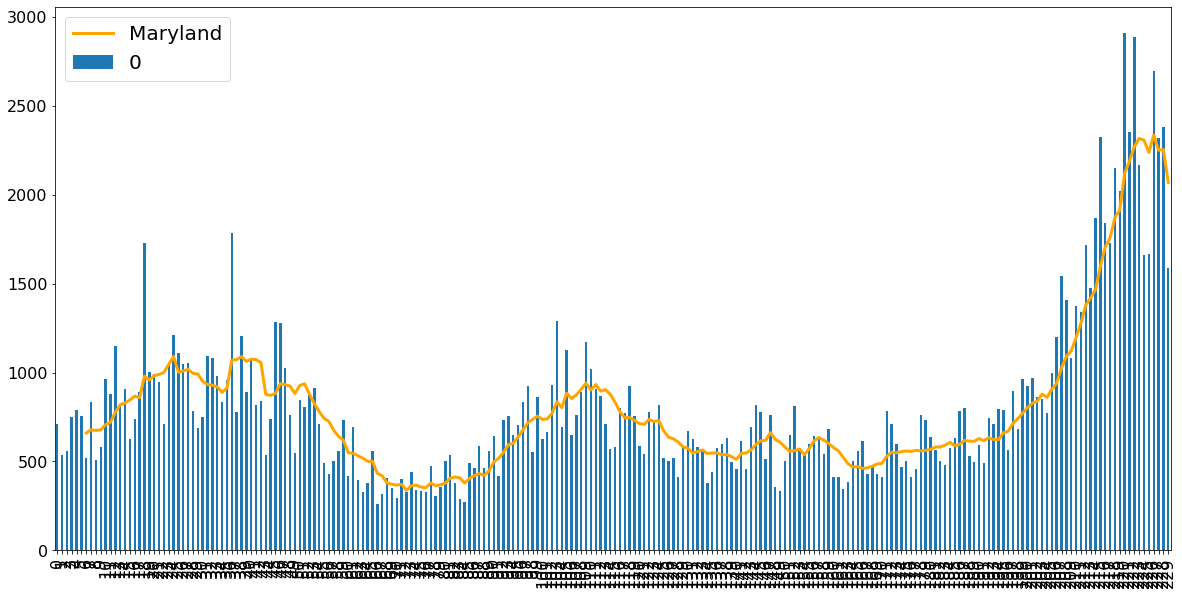

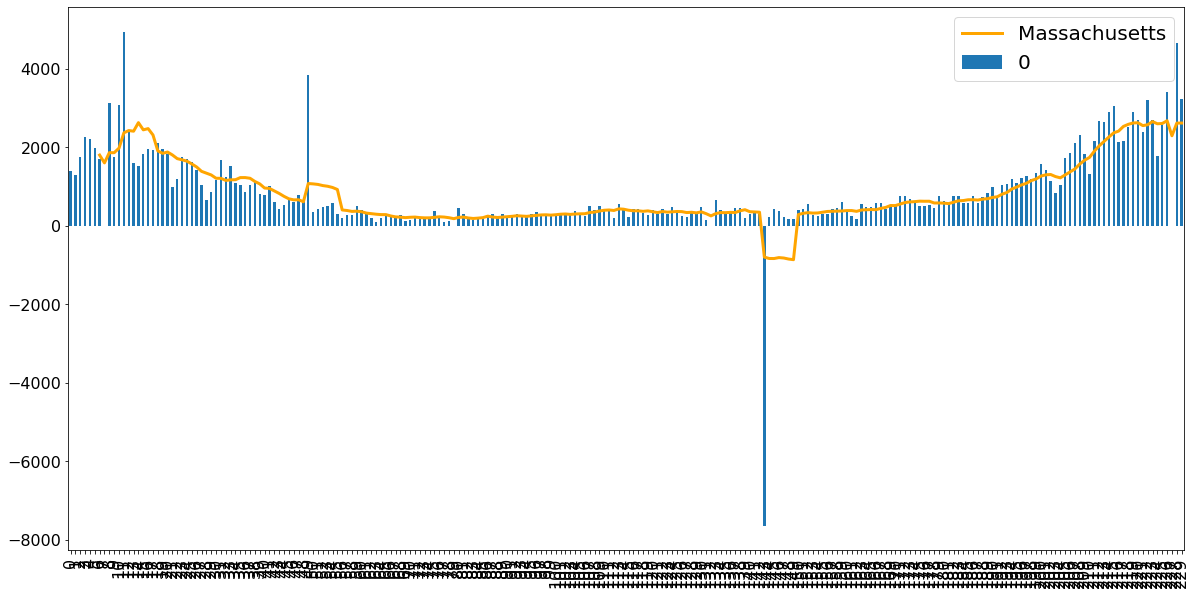

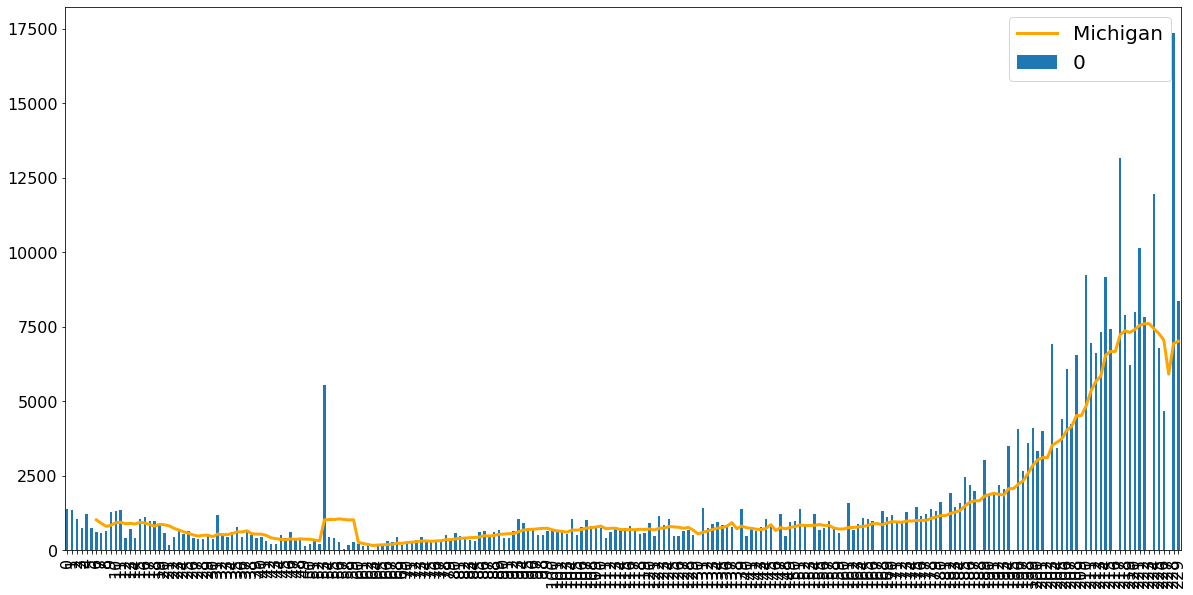

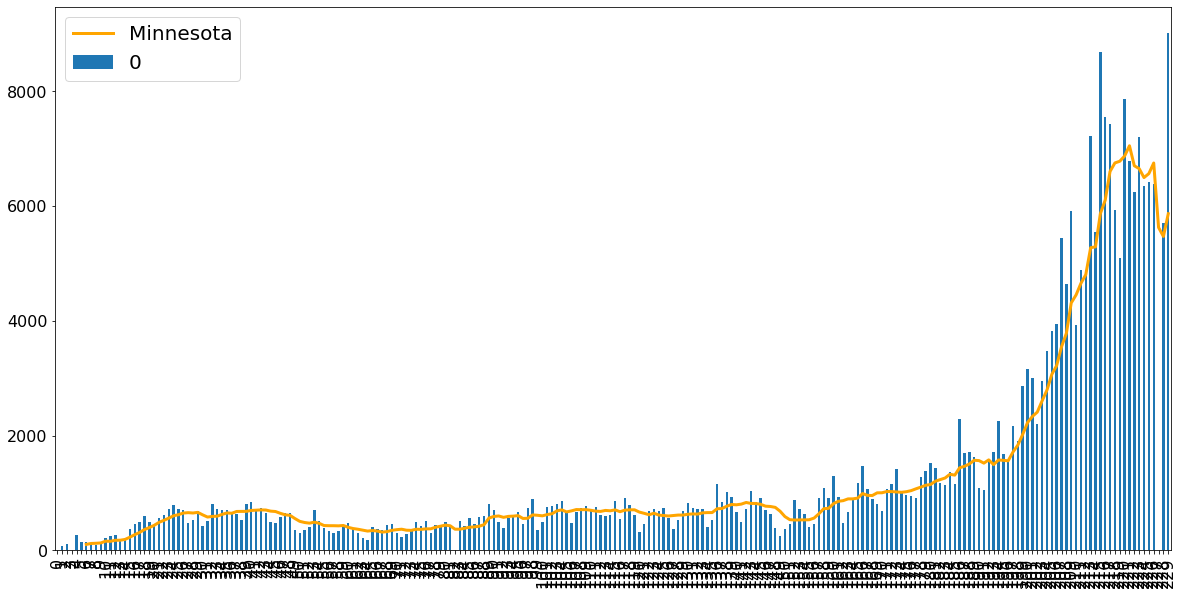

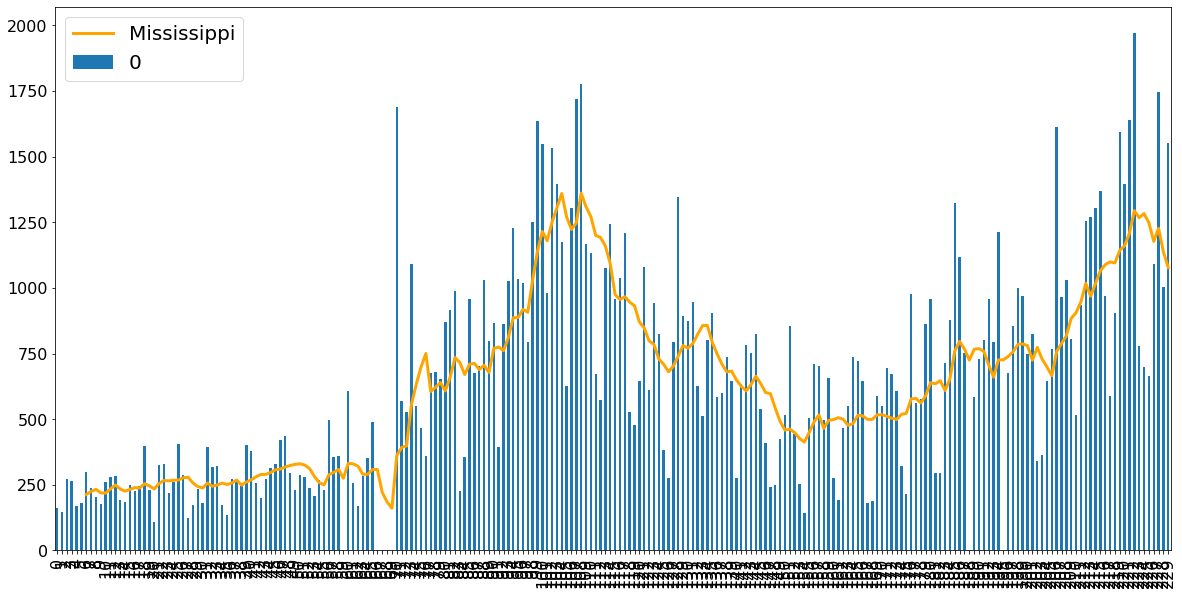

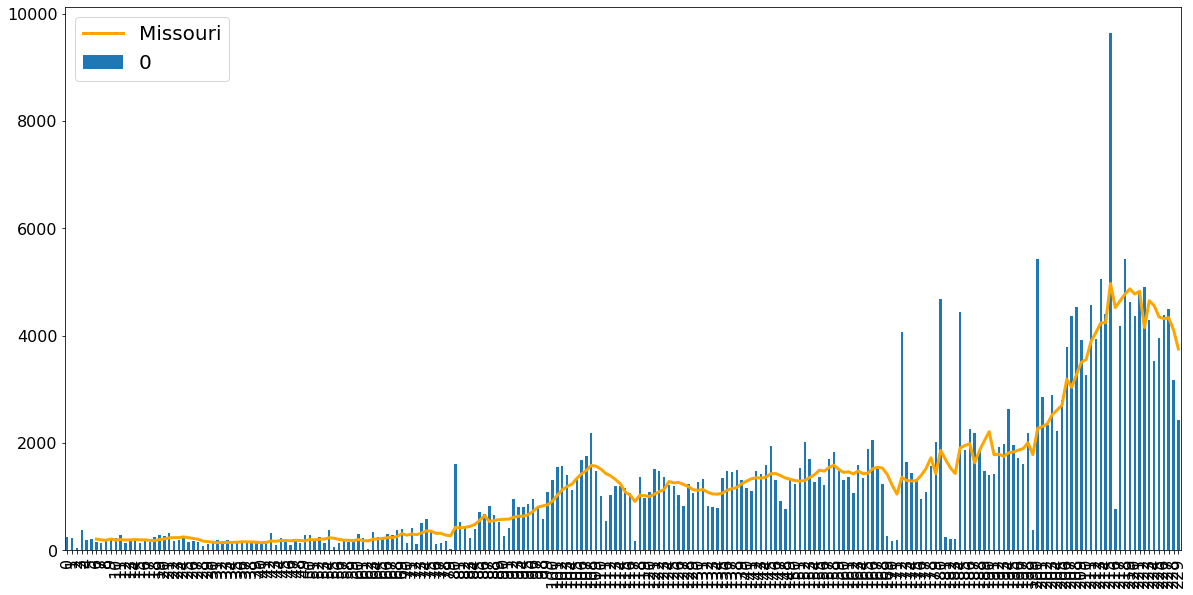

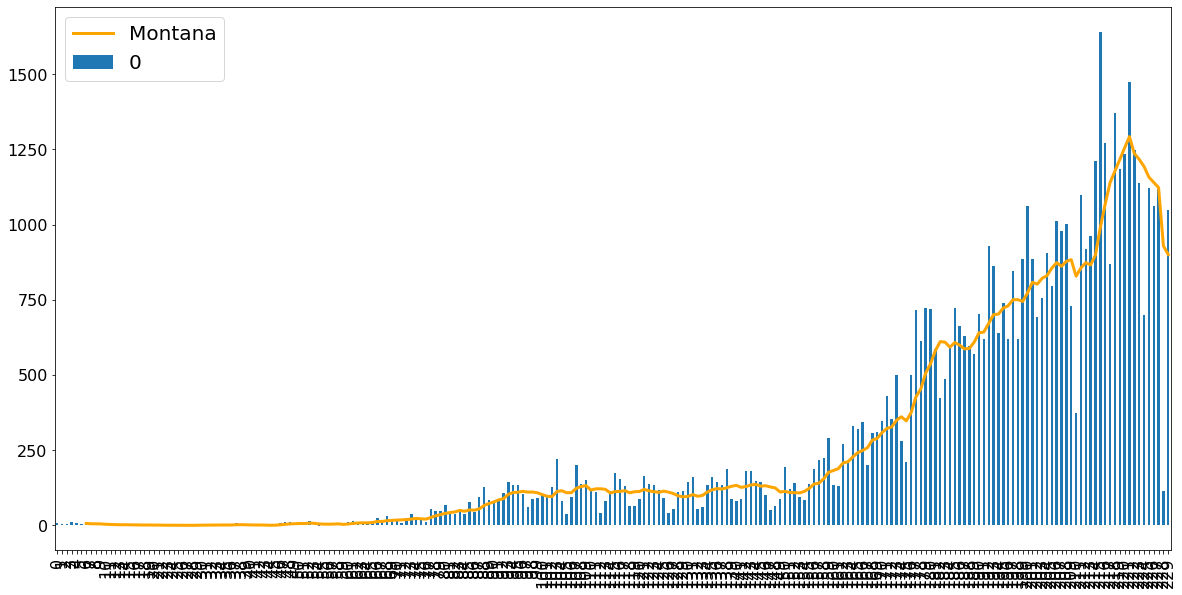

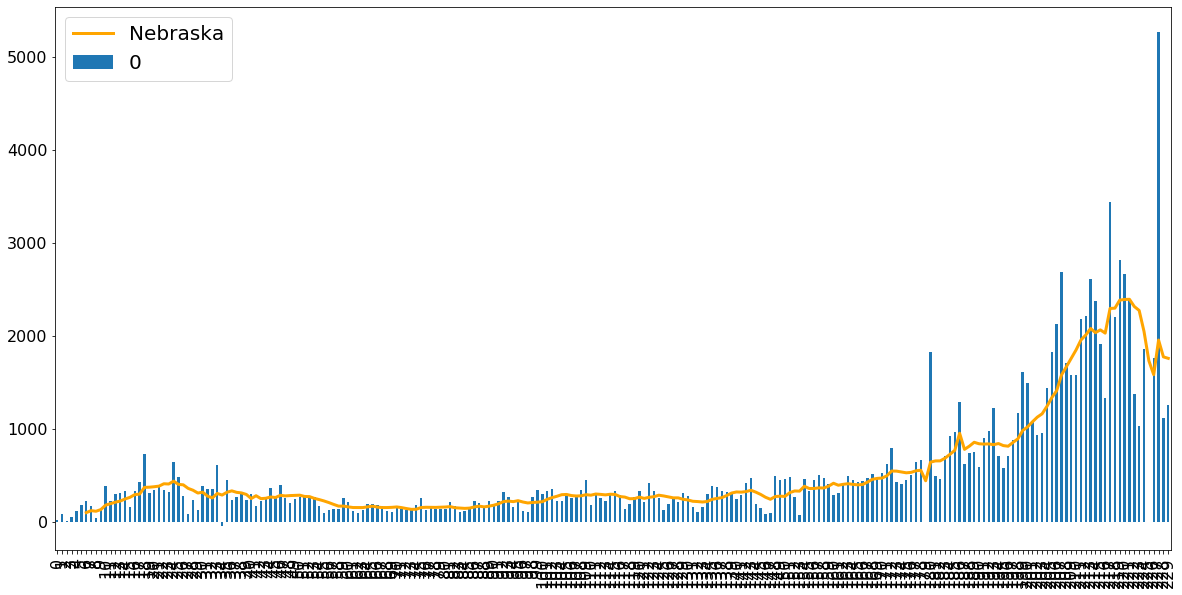

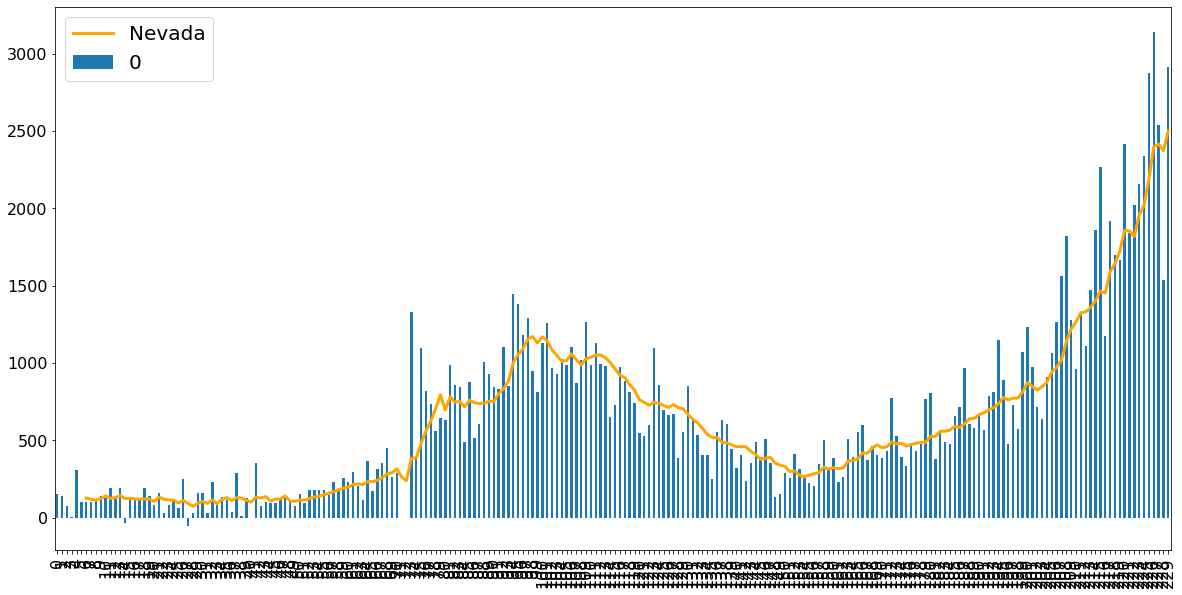

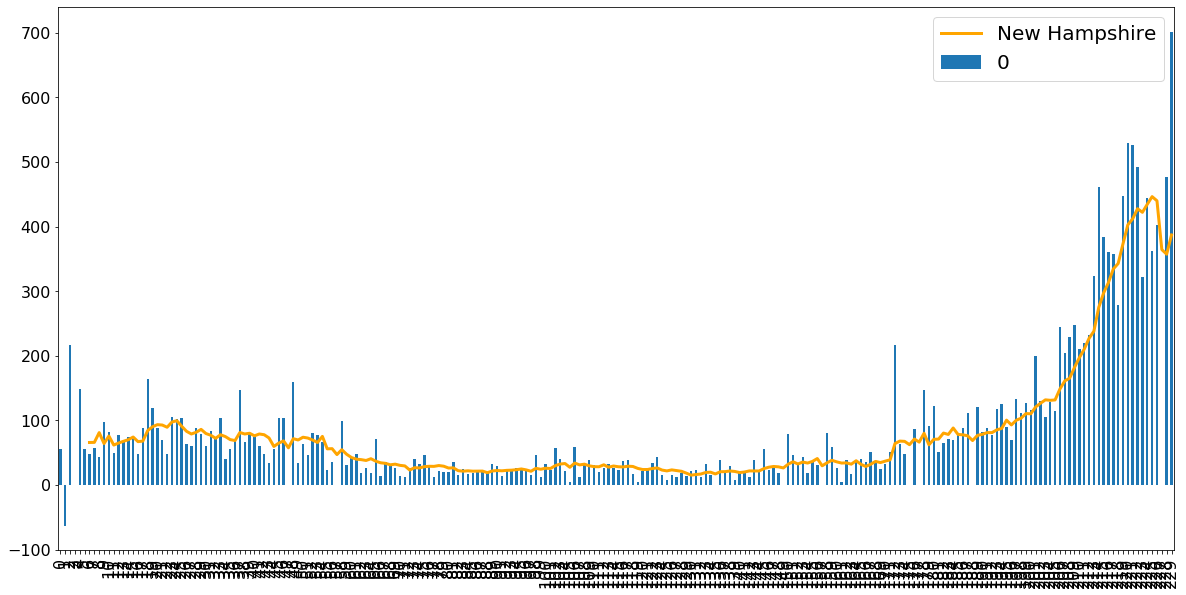

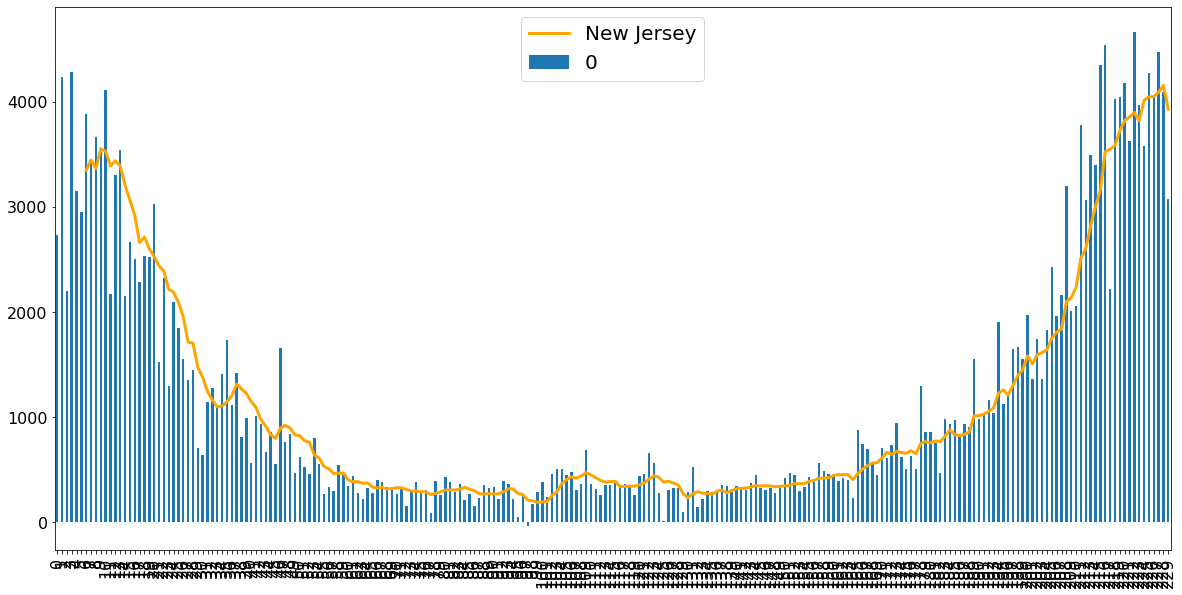

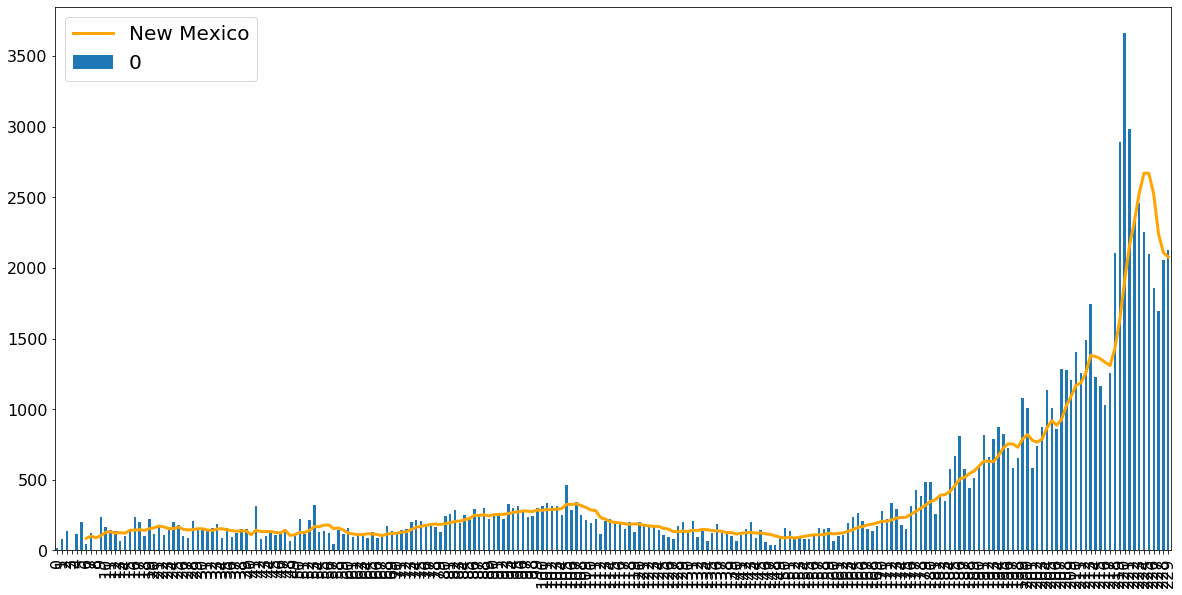

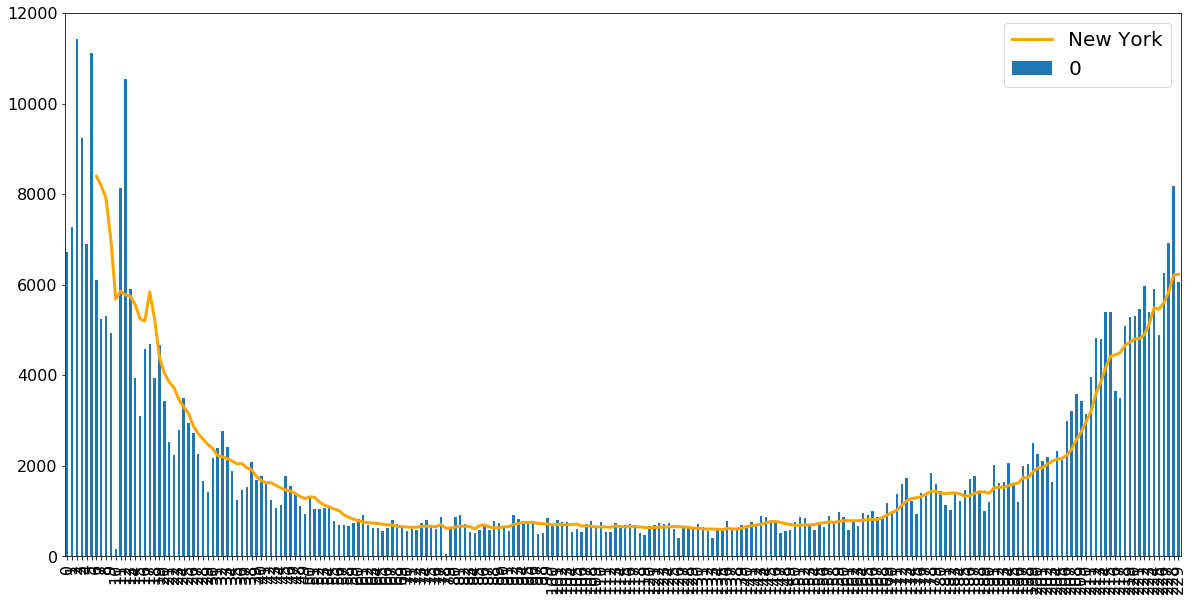

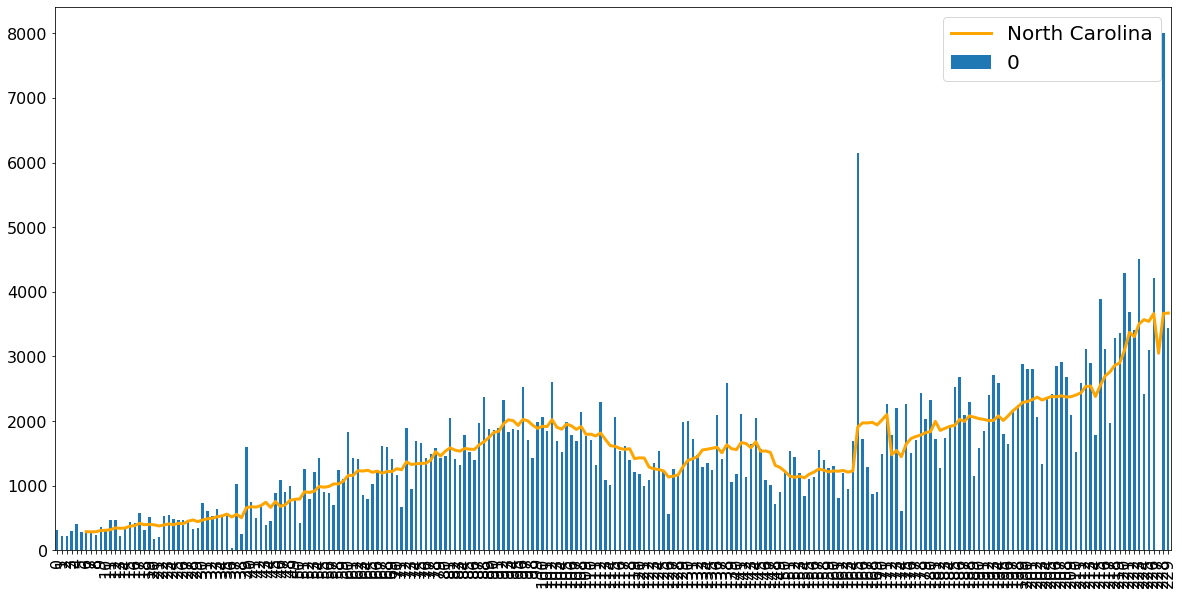

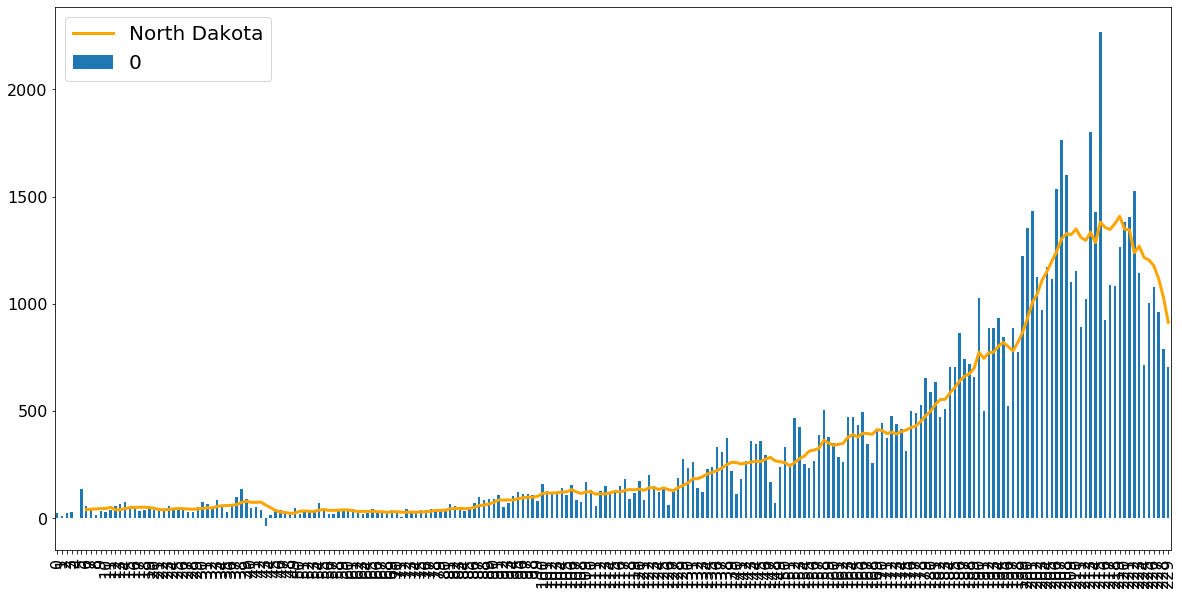

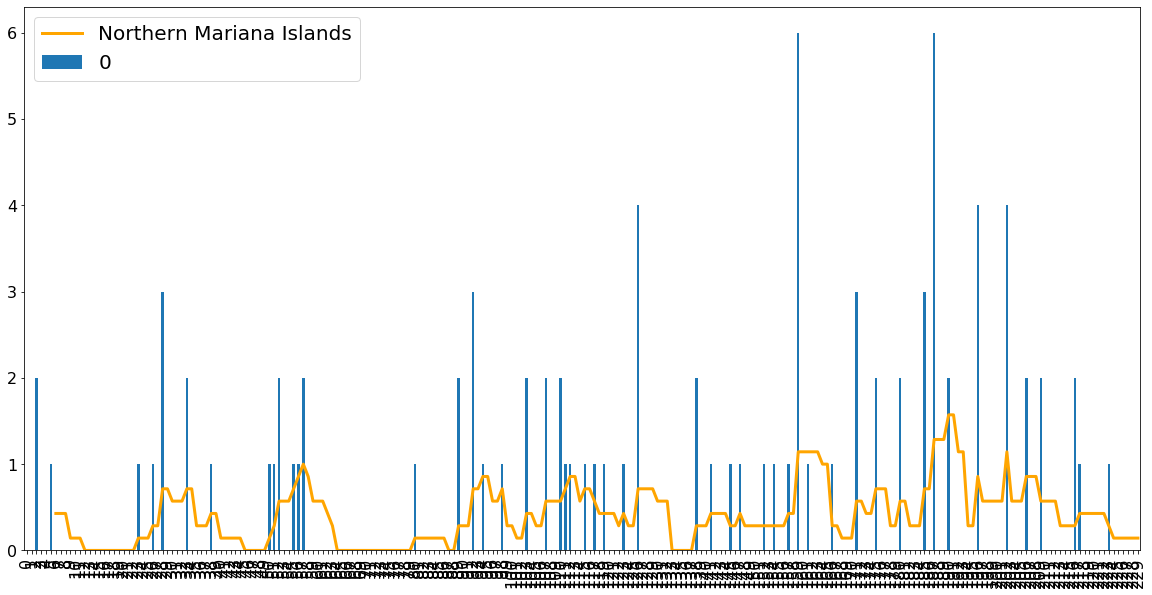

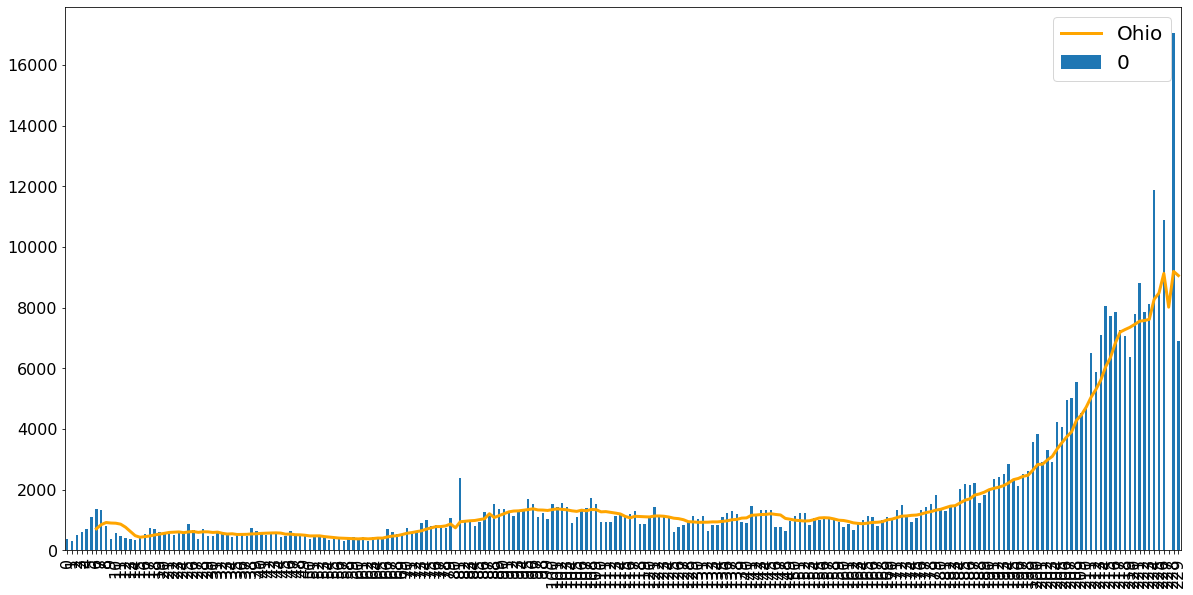

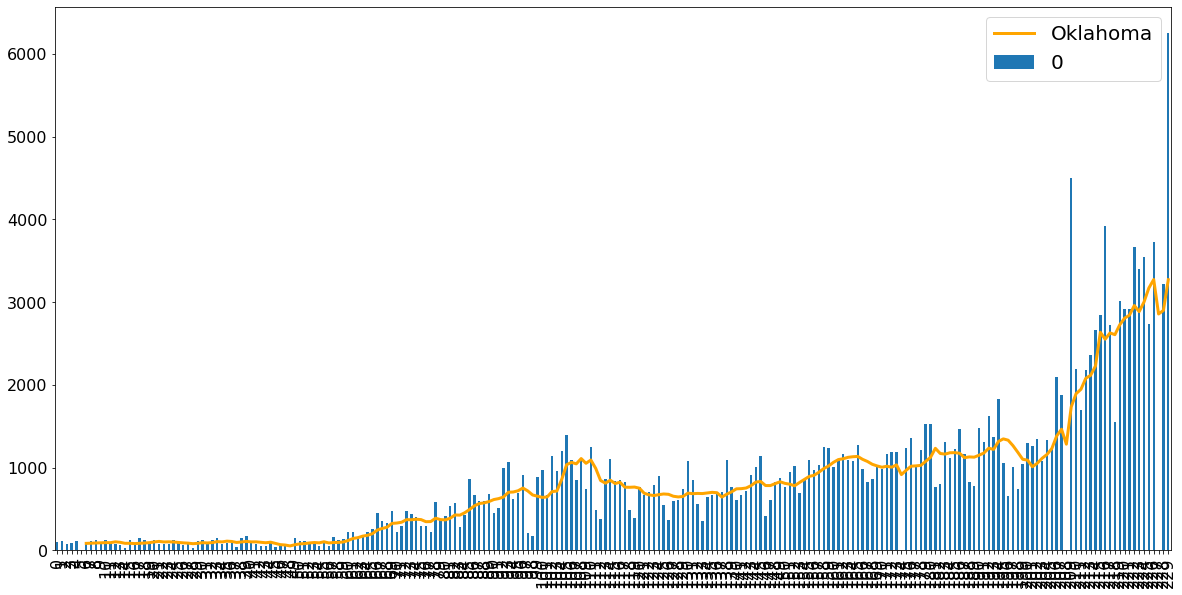

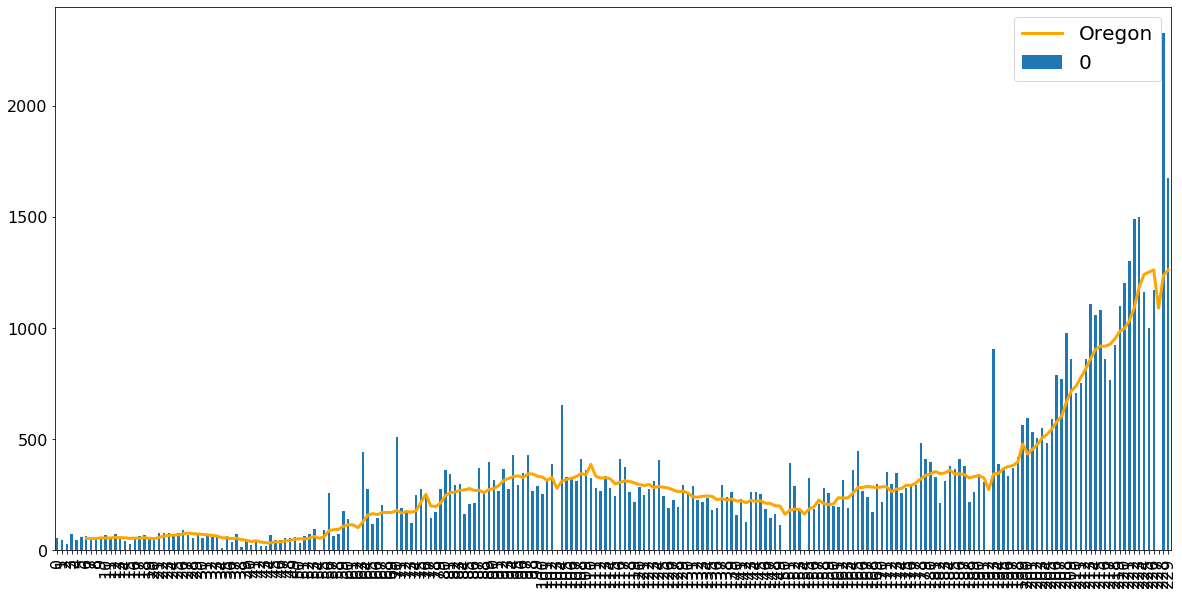

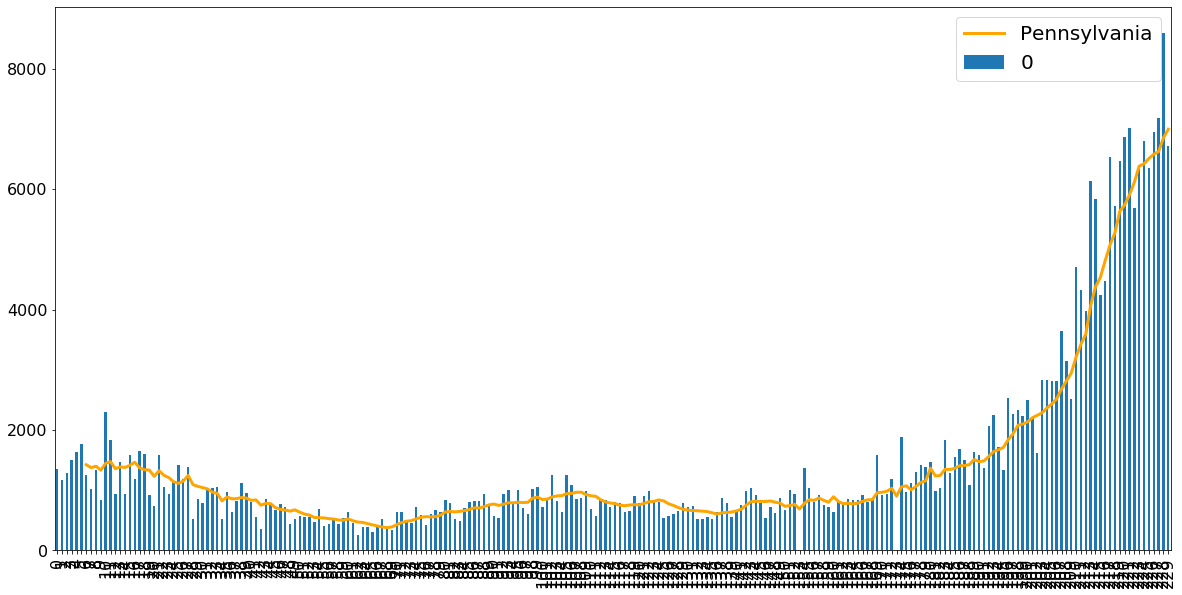

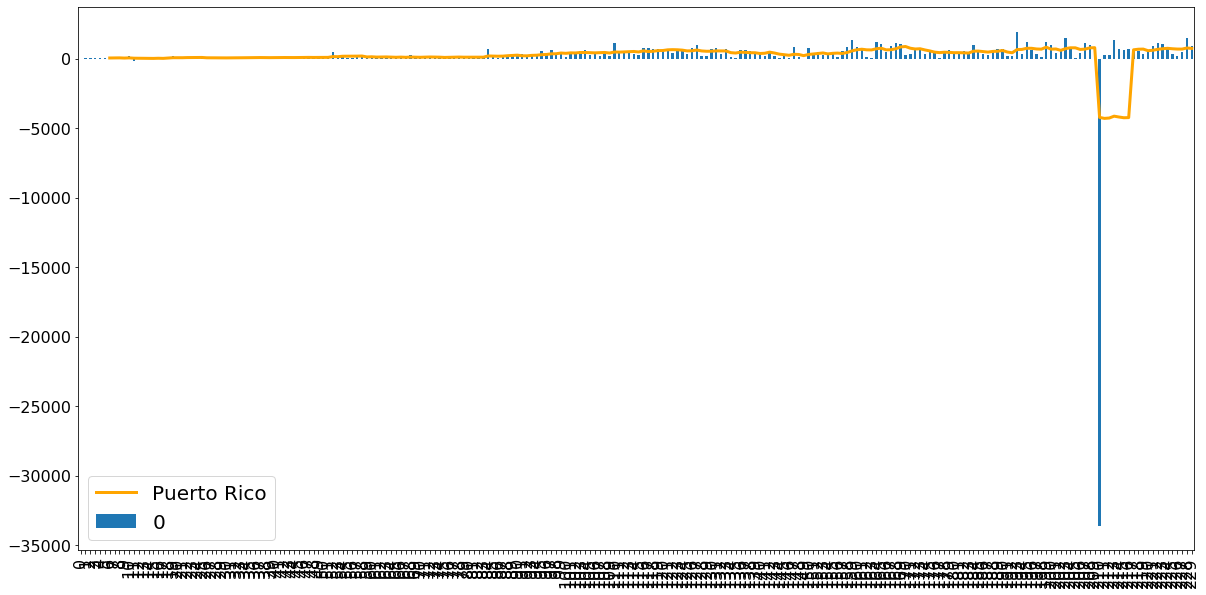

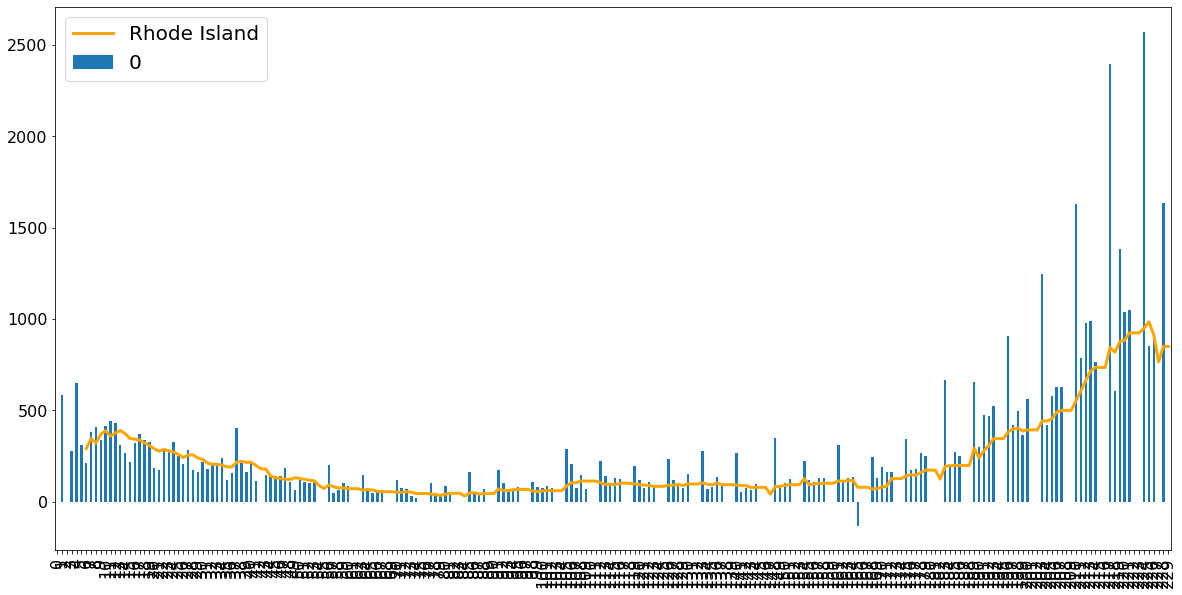

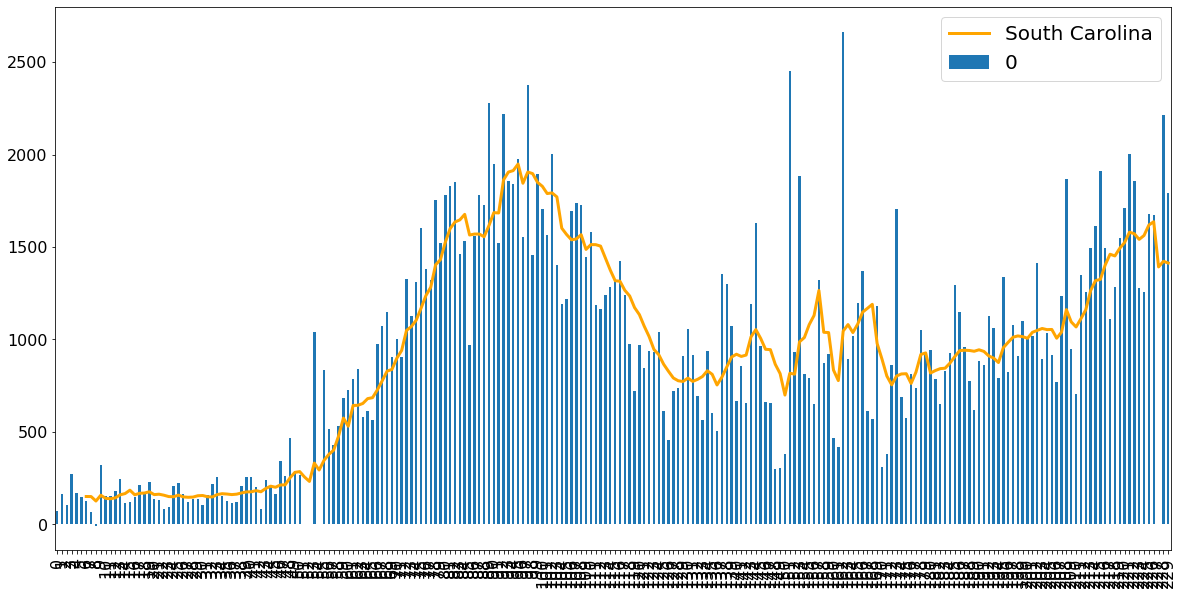

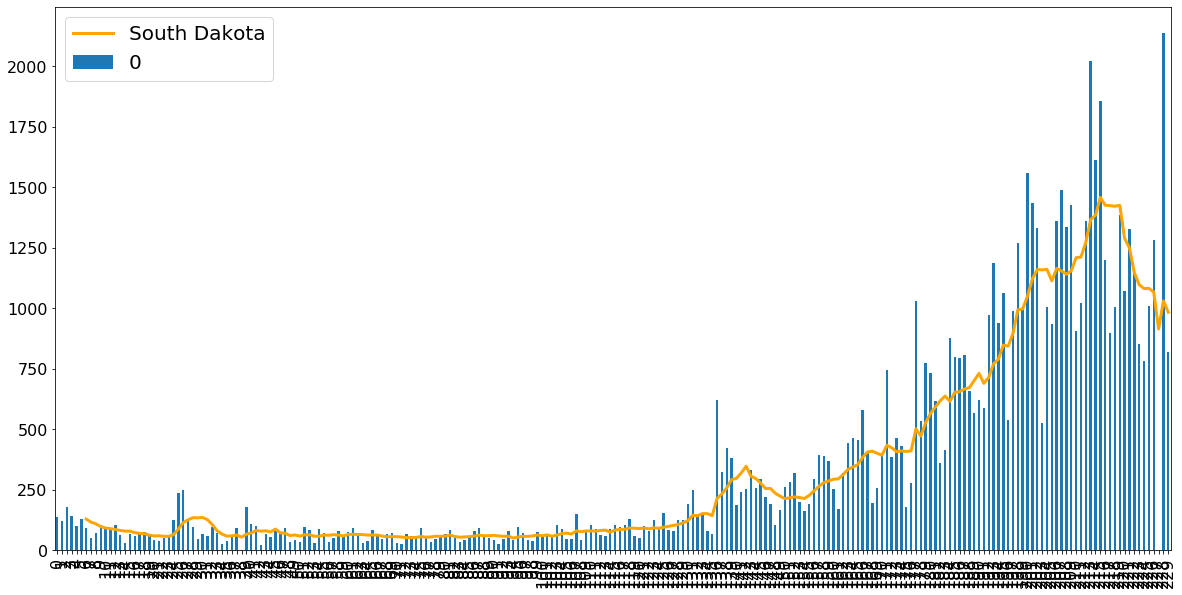

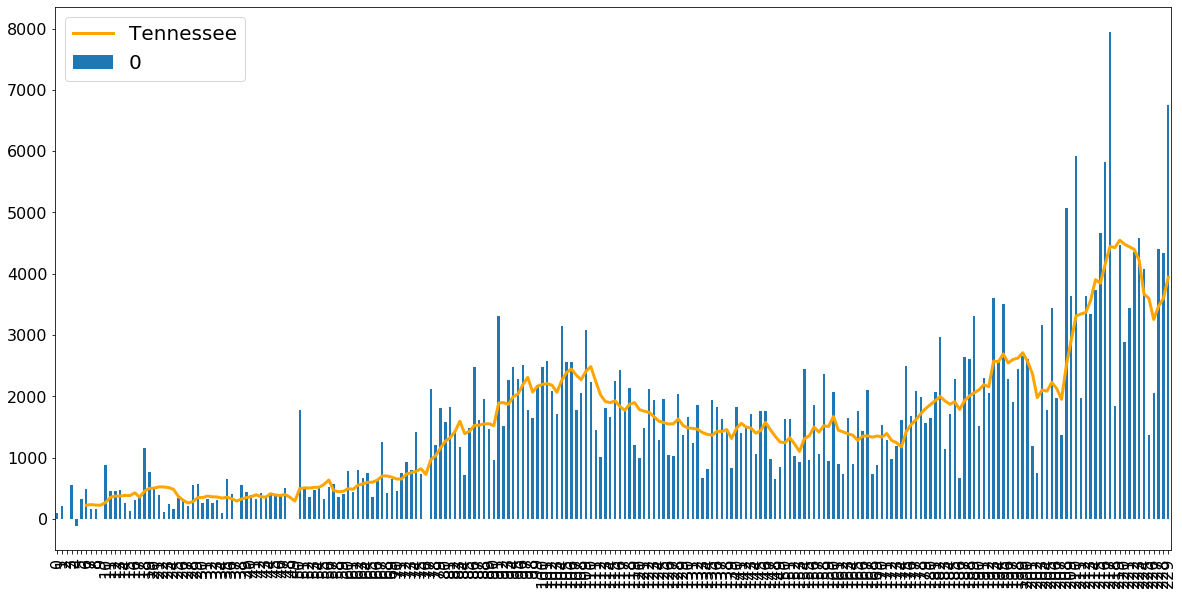

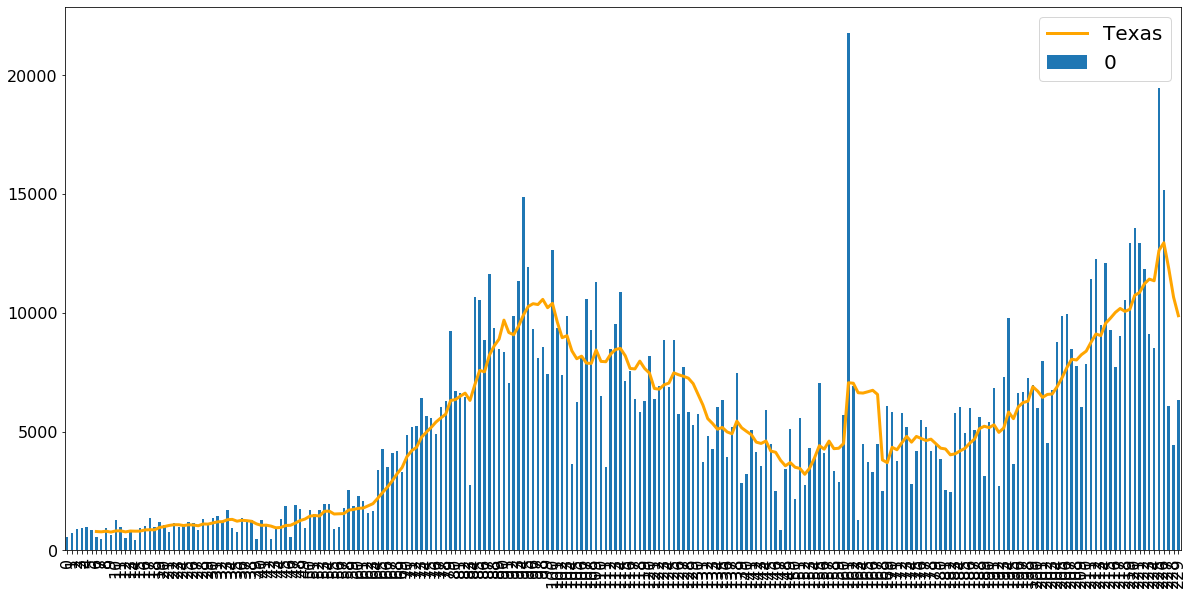

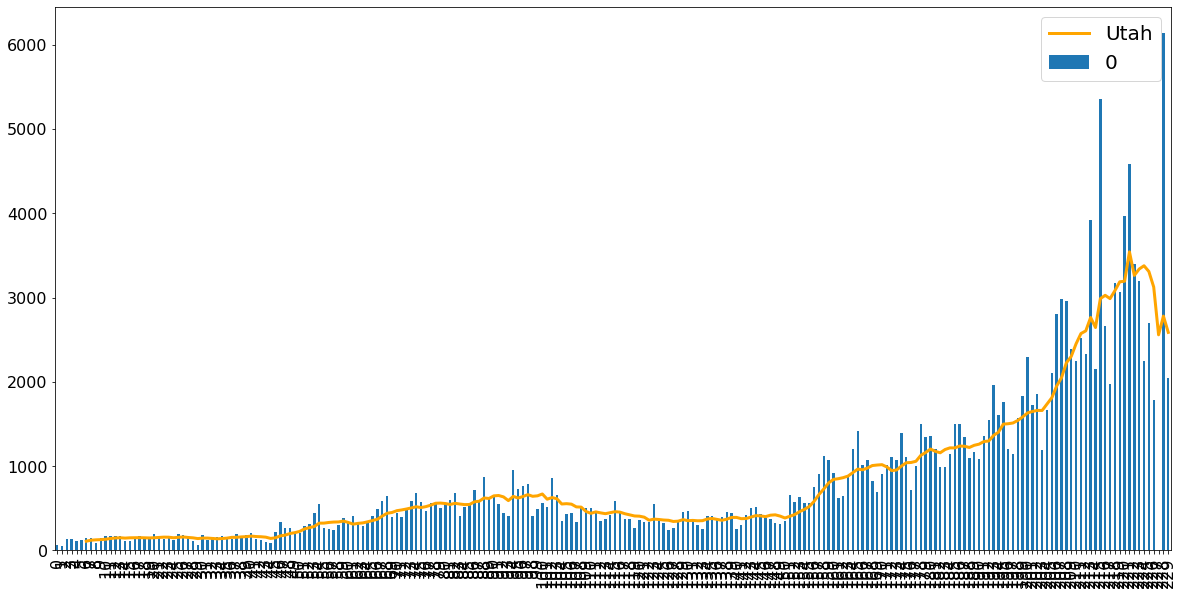

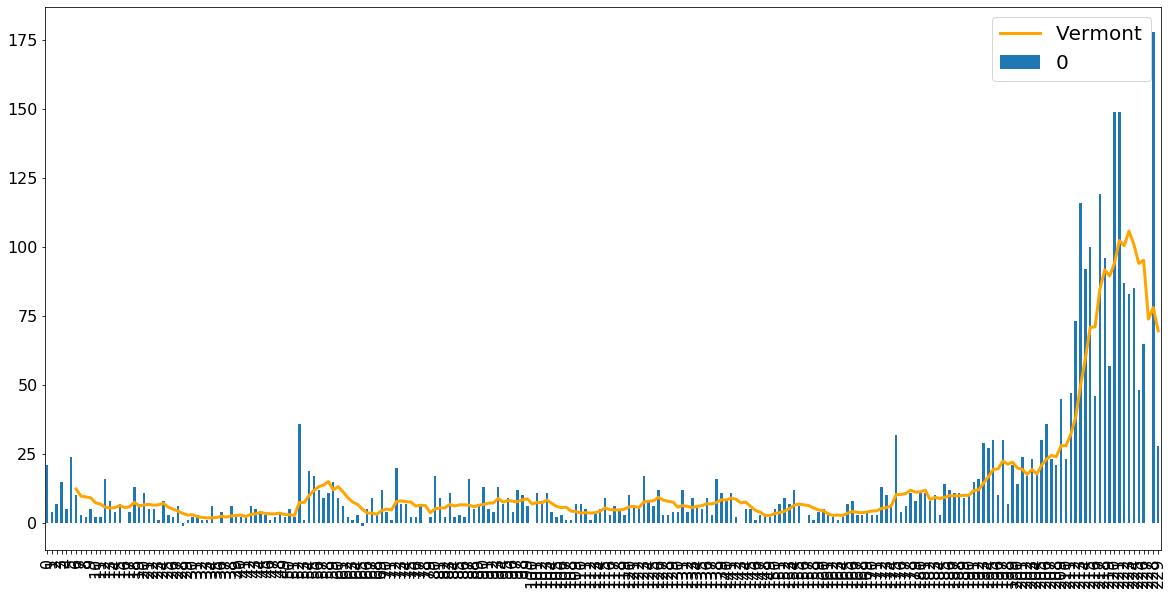

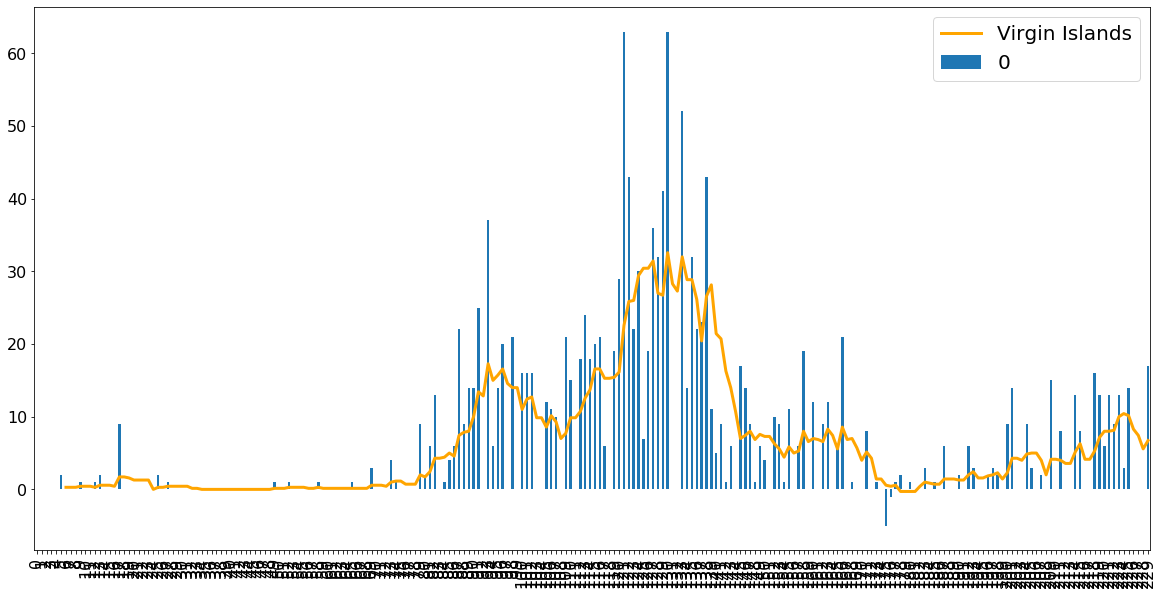

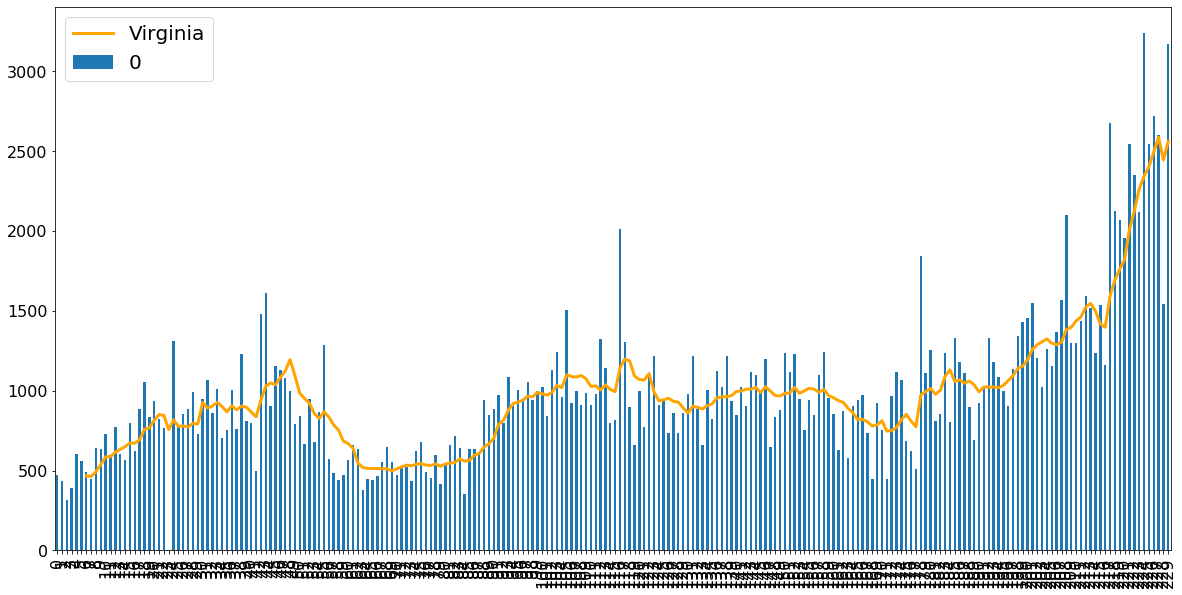

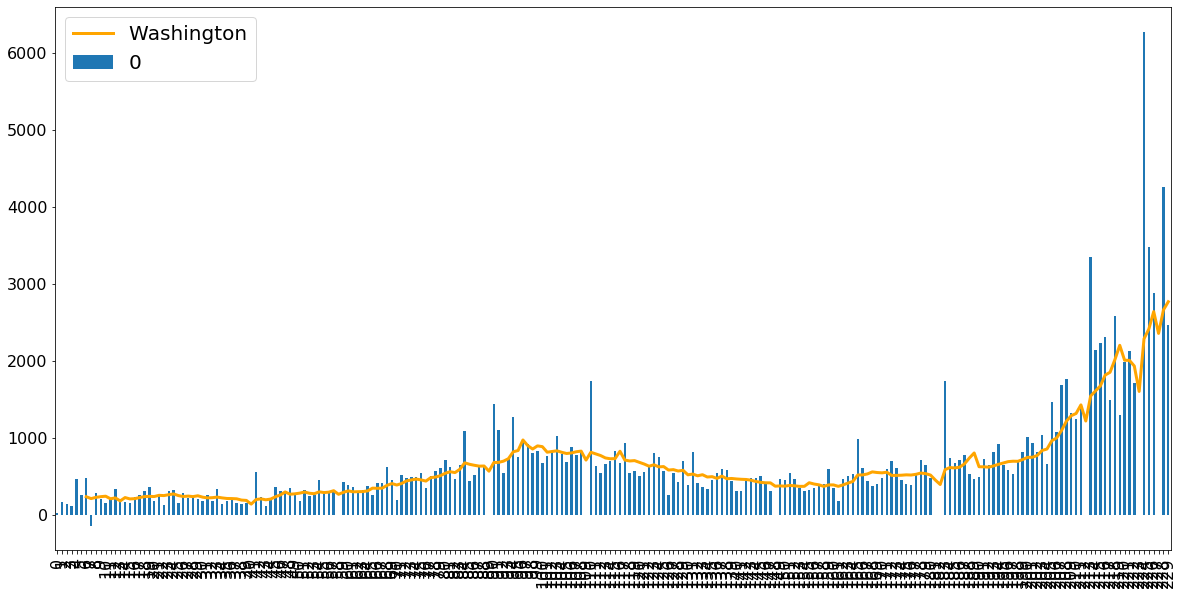

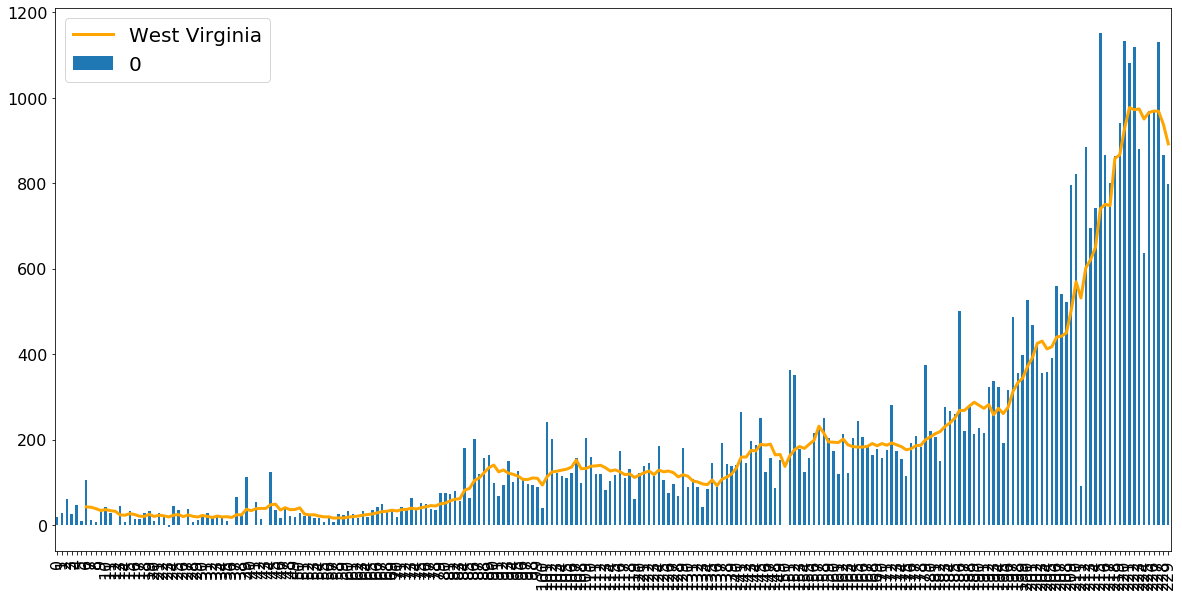

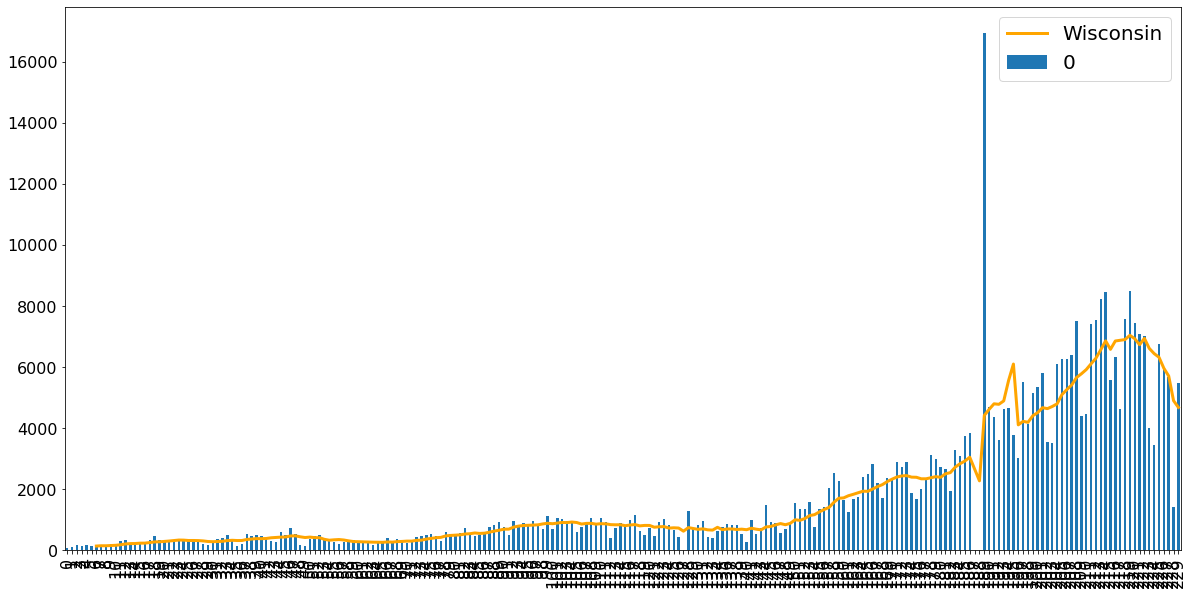

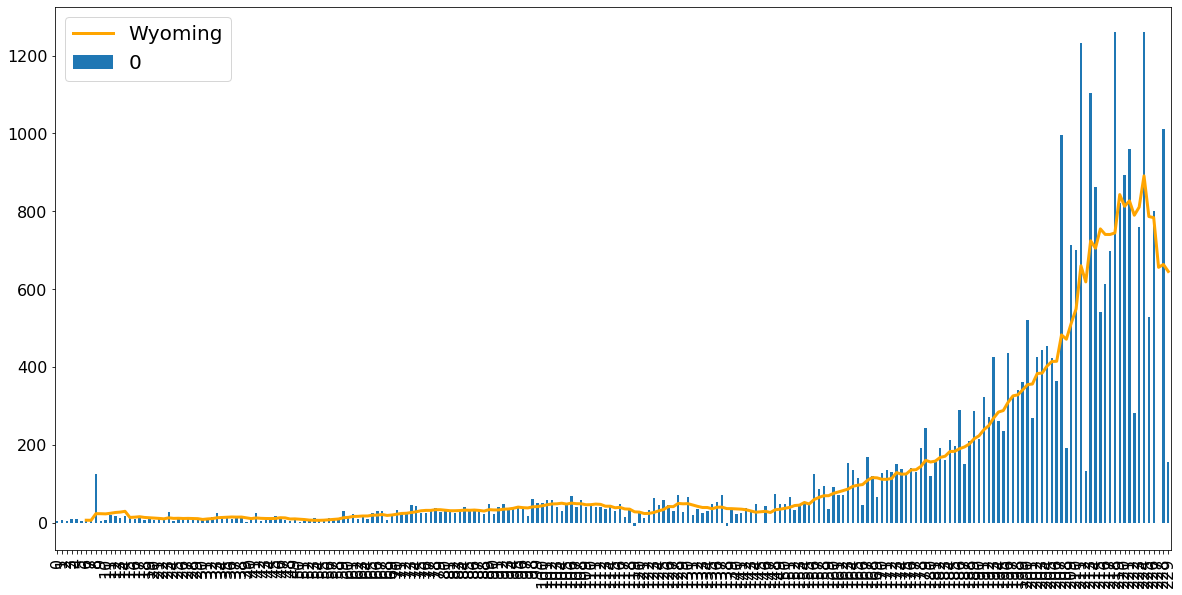

In [26]:
for state in sorted(states):
    daily_case_visualization(state)